In [32]:
import pandas as pd
pd_gaia2mass = pd.read_csv("xmatch_gaiaedr3_2MASS_3x3.csv")
print(len(pd_gaia2mass))
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

625917


solution_id                    designation            source_id  \
0  1636042515805110273  Gaia EDR3 4055388831909036672  4055388831909036672   
1  1636042515805110273  Gaia EDR3 4055388831917180416  4055388831917180416   
2  1636042515805110273  Gaia EDR3 4055388836206145152  4055388836206145152   
3  1636042515805110273  Gaia EDR3 4055388866269129728  4055388866269129728   
4  1636042515805110273  Gaia EDR3 4055388866276898048  4055388866276898048   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0    1639214180     2016.0  264.890227  0.253023 -30.860825   0.206335   
1     653300902     2016.0  264.889931  1.779484 -30.859158   1.130886   
2     182443989     2016.0  264.890609  1.957088 -30.860642   1.834921   
3      68061470     2016.0  264.869811  0.231817 -30.858301   0.176082   
4    1322405309     2016.0  264.866686  0.392935 -30.859764   0.309701   

   parallax  parallax_error  parallax_over_error        pm      pmra  \
0  1.172731        0.311091             3.769736  1.531103  1.390560   
1       NaN             NaN                  NaN       NaN       NaN   
2       NaN             NaN                  NaN       NaN       NaN   
3  0.474289        0.303486             1.562803  0.898730 -0.149941   
4  0.227638        0.519917             0.437835  4.212647 -1.403077   

   pmra_error     pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  \
0    0.319479  0.640796     0.225345     0.091410         -0.041089   
1         NaN       NaN          NaN     0.346227               NaN   
2         NaN       NaN          NaN    -0.828109               NaN   
3    0.321158 -0.886134     0.192362     0.230674         -0.213542   
4    0.610879 -3.972124     0.324275     0.374164         -0.115352   

   ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  \
0     -0.111706      -0.049880          -0.364336      -0.040592   
1           NaN            NaN                NaN            NaN   
2           NaN            NaN                NaN            NaN   
3      0.004771      -0.224326          -0.324490      -0.132112   
4     -0.114691      -0.311198          -0.097592      -0.273442   

   dec_pmdec_corr  parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0       -0.621726           -0.141133             0.400685         0.145848   
1             NaN                 NaN                  NaN              NaN   
2             NaN                 NaN                  NaN              NaN   
3       -0.654496           -0.381923             0.326204         0.197801   
4       -0.714090           -0.586469             0.037911         0.391216   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   282                     0                        282   
1                   141                     0                        141   
2                    98                     0                         98   
3                   255                     0                        252   
4                   222                     0                        222   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         0            2.901829            388.04977   
1                         0            3.947510            211.15000   
2                         0            2.960866            138.63550   
3                         3           -0.135831            352.41806   
4                         0            0.522548            245.74036   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  0.954904                      2.584439   
1                  4.433084                      2.888512   
2                  2.911523                      2.113322   
3                  0.981552                      4.612199   
4                  0.719671                      0.812147   

   astrometric_params_solved  astrometric_primary_flag  \
0                         95          

In [33]:
import numpy as np
pd_gaia2mass["l"] = np.where(pd_gaia2mass["l"] >180, pd_gaia2mass["l"] -360, pd_gaia2mass["l"] )
pd_gaia2mass["Hw"] = pd_gaia2mass["h_m"] + 0.75 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) - 0.027 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"])
pd_gaia2mass["j_h"] = pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]
pd_gaia2mass["j_k"] = pd_gaia2mass["j_m"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["g_k"] = pd_gaia2mass["phot_g_mean_mag"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["distance"] = 1 / pd_gaia2mass["parallax"]* 1000
pd_gaia2mass["Mg"] = pd_gaia2mass["phot_g_mean_mag"] - (5 * np.log10(1 / pd_gaia2mass["parallax"]* 1000) - 5)
pd_gaia2mass['distance_from_center'] = np.sqrt(pd_gaia2mass["l"]*pd_gaia2mass["l"]+pd_gaia2mass["b"]*pd_gaia2mass["b"])
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


solution_id                    designation            source_id  \
0  1636042515805110273  Gaia EDR3 4055388831909036672  4055388831909036672   
1  1636042515805110273  Gaia EDR3 4055388831917180416  4055388831917180416   
2  1636042515805110273  Gaia EDR3 4055388836206145152  4055388836206145152   
3  1636042515805110273  Gaia EDR3 4055388866269129728  4055388866269129728   
4  1636042515805110273  Gaia EDR3 4055388866276898048  4055388866276898048   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0    1639214180     2016.0  264.890227  0.253023 -30.860825   0.206335   
1     653300902     2016.0  264.889931  1.779484 -30.859158   1.130886   
2     182443989     2016.0  264.890609  1.957088 -30.860642   1.834921   
3      68061470     2016.0  264.869811  0.231817 -30.858301   0.176082   
4    1322405309     2016.0  264.866686  0.392935 -30.859764   0.309701   

   parallax  parallax_error  parallax_over_error        pm      pmra  \
0  1.172731        0.311091             3.769736  1.531103  1.390560   
1       NaN             NaN                  NaN       NaN       NaN   
2       NaN             NaN                  NaN       NaN       NaN   
3  0.474289        0.303486             1.562803  0.898730 -0.149941   
4  0.227638        0.519917             0.437835  4.212647 -1.403077   

   pmra_error     pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  \
0    0.319479  0.640796     0.225345     0.091410         -0.041089   
1         NaN       NaN          NaN     0.346227               NaN   
2         NaN       NaN          NaN    -0.828109               NaN   
3    0.321158 -0.886134     0.192362     0.230674         -0.213542   
4    0.610879 -3.972124     0.324275     0.374164         -0.115352   

   ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  \
0     -0.111706      -0.049880          -0.364336      -0.040592   
1           NaN            NaN                NaN            NaN   
2           NaN            NaN                NaN            NaN   
3      0.004771      -0.224326          -0.324490      -0.132112   
4     -0.114691      -0.311198          -0.097592      -0.273442   

   dec_pmdec_corr  parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0       -0.621726           -0.141133             0.400685         0.145848   
1             NaN                 NaN                  NaN              NaN   
2             NaN                 NaN                  NaN              NaN   
3       -0.654496           -0.381923             0.326204         0.197801   
4       -0.714090           -0.586469             0.037911         0.391216   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   282                     0                        282   
1                   141                     0                        141   
2                    98                     0                         98   
3                   255                     0                        252   
4                   222                     0                        222   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         0            2.901829            388.04977   
1                         0            3.947510            211.15000   
2                         0            2.960866            138.63550   
3                         3           -0.135831            352.41806   
4                         0            0.522548            245.74036   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  0.954904                      2.584439   
1                  4.433084                      2.888512   
2                  2.911523                      2.113322   
3                  0.981552                      4.612199   
4                  0.719671                      0.812147   

   astrometric_params_solved  astrometric_primary_flag  \
0                         95          

In [34]:
min_l = -2
max_l = 0.7
min_b = 0
max_b = 0.3
pd_gaia2mass_jsky = pd_gaia2mass.query( '(@min_l <= l <= @max_l and @min_b <= b <= @max_b) or distance_from_center<0.7')
print(len(pd_gaia2mass_jsky))
pd_gaia2mass_jsky.to_csv("xmatch_gaiaedr3_2MASS_v2.csv")
pd_gaia2mass_jsky.head()

83284


solution_id                    designation  \
51302  1636042515805110273  Gaia EDR3 4060593198403873792   
51303  1636042515805110273  Gaia EDR3 4060593198410850560   
51304  1636042515805110273  Gaia EDR3 4060593198410851712   
51305  1636042515805110273  Gaia EDR3 4060593202704439808   
51306  1636042515805110273  Gaia EDR3 4060593202705863424   

                 source_id  random_index  ref_epoch          ra  ra_error  \
51302  4060593198403873792     476520653     2016.0  266.132094  0.112051   
51303  4060593198410850560     994502486     2016.0  266.137857  1.385989   
51304  4060593198410851712    1601070905     2016.0  266.138958  0.673125   
51305  4060593202704439808    1106805204     2016.0  266.138877  0.735179   
51306  4060593202705863424     157114815     2016.0  266.137641  8.843927   

             dec  dec_error  parallax  parallax_error  parallax_over_error  \
51302 -28.286220   0.085324  0.395601        0.132035             2.996179   
51303 -28.284957   0.907056  2.192921        1.511197             1.451115   
51304 -28.276578   0.479445  0.520995        0.643869             0.809163   
51305 -28.281432   0.517113  0.722404        0.652482             1.107161   
51306 -28.278507   6.840937       NaN             NaN                  NaN   

              pm      pmra  pmra_error     pmdec  pmdec_error  ra_dec_corr  \
51302   3.235812 -1.424490    0.149592 -2.905394     0.081049     0.233256   
51303   2.185916 -1.819939    1.644965 -1.210807     0.891068     0.510056   
51304   3.387253 -3.372644    0.809625  0.314245     0.453696     0.464357   
51305  10.434248 -9.561052    0.727207 -4.178492     0.442747     0.643702   
51306        NaN       NaN         NaN       NaN          NaN     0.927879   

       ra_parallax_corr  ra_pmra_corr  ra_pmdec_corr  dec_parallax_corr  \
51302         -0.158944      0.025527      -0.074178          -0.429679   
51303         -0.537190      0.112925      -0.257855          -0.447584   
51304         -0.087324     -0.020870      -0.218130          -0.156817   
51305         -0.332670     -0.090131      -0.405678          -0.371741   
51306               NaN           NaN            NaN                NaN   

       dec_pmra_corr  dec_pmdec_corr  parallax_pmra_corr  parallax_pmdec_corr  \
51302       0.063685       -0.705580           -0.185109             0.409811   
51303      -0.041580       -0.671750           -0.356328             0.260423   
51304      -0.131304       -0.669135           -0.149536             0.153101   
51305      -0.190170       -0.741801           -0.068063             0.310446   
51306            NaN             NaN                 NaN                  NaN   

       pmra_pmdec_corr  astrometric_n_obs_al  astrometric_n_obs_ac  \
51302         0.159324                   405                     0   
51303         0.286477                   230                     0   
51304         0.381923                   340                     0   
51305         0.404711                   340                     0   
51306              NaN                    96                     0   

       astrometric_n_good_obs_al  astrometric_n_bad_obs_al  \
51302                        403                         2   
51303                        228                         2   
51304                        339                         1   
51305                        339                         1   
51306                         96                         0   

       astrometric_gof_al  astrometric_chi2_al  astrometric_excess_noise  \
51302            1.422572            459.43460                  0.000000   
51303            3.348362            340.84085                  4.079796   
51304            4.394321            504.59067                  2.711117   
51305            4.419433            537.30560                  2.360356   
51306            3.256388            141.48305                  4.742367   

       astrometric_excess_noise_sig  astrometric_params_so

In [35]:
# import numpy as np
# from astropy import units as u
# from astropy.coordinates import SkyCoord
# lcenter = 0
# bcenter = 0
# ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
# sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
# print(sky_org)
# width = 1.5

# min_ra = sky_org[0] - width/2
# max_ra = sky_org[0] + width/2
# min_dec = sky_org[1] - width/2
# max_dec = sky_org[1] + width/2
# pd_gaia2mass_jsky = pd_gaia2mass.query( '@min_ra <= ra <= @max_ra and @min_dec <= dec <= @max_dec')
# print(len(pd_gaia2mass_jsky))
# pd_gaia2mass_jsky.head()

In [105]:
min_Hw_b = 3.0
max_Hw_b = 9.5
pd_gaia2mass_b = pd_gaia2mass.query( '@min_Hw_b <= Hw < @max_Hw_b')
pd_gaia2mass_jsky_b = pd_gaia2mass_jsky.query( '@min_Hw_b <= Hw < @max_Hw_b')
print(len(pd_gaia2mass_jsky_b))

# min_Hw_b = 3.0
# max_Hw_b = 7.0
# pd_gaia2mass_b = pd_gaia2mass.query( '@min_Hw_b <= phot_g_mean_mag < @max_Hw_b')
# pd_gaia2mass_jsky_b = pd_gaia2mass_jsky.query( '@min_Hw_b <= phot_g_mean_mag < @max_Hw_b')
# print(len(pd_gaia2mass_jsky_b))

min_Hw_t = 9.5
max_Hw_t = 15.0
pd_gaia2mass_t = pd_gaia2mass.query( '@min_Hw_t <= Hw < @max_Hw_t')
pd_gaia2mass_jsky_t = pd_gaia2mass_jsky.query( '@min_Hw_t <= Hw < @max_Hw_t')
print(len(pd_gaia2mass_jsky_t))

min_parallax_f = 1
max_parallax_f = 5
pd_gaia2mass_f = pd_gaia2mass.query( '@min_parallax_f <= parallax < @max_parallax_f')
pd_gaia2mass_jsky_f = pd_gaia2mass_jsky.query( '@min_parallax_f <= parallax < @max_parallax_f')
print(len(pd_gaia2mass_f))
print(len(pd_gaia2mass_jsky_f))

min_parallax_n = 5
max_parallax_n = 10
pd_gaia2mass_n = pd_gaia2mass.query( '@min_parallax_n <= parallax < @max_parallax_n')
pd_gaia2mass_jsky_n = pd_gaia2mass_jsky.query( '@min_parallax_n <= parallax < @max_parallax_n')
print(len(pd_gaia2mass_n))
print(len(pd_gaia2mass_jsky_n))

min_parallax_m = 10
max_parallax_m = 100
pd_gaia2mass_m = pd_gaia2mass.query( '@min_parallax_m <= parallax < @max_parallax_m')
pd_gaia2mass_jsky_m = pd_gaia2mass_jsky.query( '@min_parallax_m <= parallax < @max_parallax_m')
print(len(pd_gaia2mass_m))
print(len(pd_gaia2mass_jsky_m))

612
63156
50378
8834
1235
132
186
15


In [37]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
14406


/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'URAT1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source     Plx  \
0  266.296806    14.8761 -29.135035     9.7728  4057104070060689280     NaN   
1  266.294476     2.3699 -29.135177     1.7434  4057104074345828736     NaN   
2  266.295908     0.0418 -29.134110     0.0336  4057104074348007808  0.4910   
3  266.275460     0.3111 -29.133310     0.2450  4057104104409847040  0.4692   
4  266.273611     1.9220 -29.133917     2.2113  4057104108705564288     NaN   

    e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE            FG     e_FG  \
0     NaN    NaN    NaN     NaN    NaN     NaN    NaN     79.003998  1.11960   
1     NaN    NaN    NaN     NaN    NaN     NaN    NaN    104.040001  0.87496   
2  0.0459  3.394 -0.052   0.050 -3.394   0.032  1.149  11382.000000  4.03720   
3  0.3106  0.260 -0.150   0.376  0.213   0.232  1.036    518.119995  1.10150   
4     NaN    NaN    NaN     NaN    NaN     NaN    NaN    103.379997  0.76817   

        Gmag    e_Gmag          FBP      e_FBP      BPmag   e_BPmag  \
0  20.943241  0.015631   141.800003  84.369003  19.959318  0.645981   
1  20.644325  0.009537    32.414001   6.943900  21.561722  0.232612   
2  15.546850  0.002782  3901.100098  17.056000  16.360567  0.005506   
3  18.901281  0.003594    49.337002   9.537200  21.105600  0.209896   
4  20.651226  0.008525    27.243000   3.652300  21.750422  0.145586   

            FRP    e_FRP      RPmag   e_RPmag     BP-RP  RVDR2  e_RVDR2  \
0    170.199997  11.4080  19.170520  0.072876  0.788797    NaN      NaN   
1    127.269997   6.4187  19.486113  0.054890  2.075609    NaN      NaN   
2  10947.000000  14.5220  14.649655  0.004045  1.710912    NaN      NaN   
3    970.989990   9.6315  17.279858  0.011414  3.825743    NaN      NaN   
4    154.639999  13.7250  19.274565  0.096438  2.475857    NaN      NaN   

   Tefftemp  loggtemp           PS1  SDSSDR13   SkyMapper2  URAT1   GmagCorr  \
0       NaN       NaN  7.303266e+16       NaN          NaN    NaN  20.943241   
1       NaN       NaN  7.303266e+16       NaN          NaN    NaN  20.644325   
2       NaN       NaN  7.303266e+16       NaN  164532442.0    NaN  15.546850   
3       NaN       NaN  7.304266e+16       NaN  164532424.0    NaN  18.875690   
4       NaN       NaN  7.303266e+16       NaN          NaN    NaN  20.651226   

   e_GmagCorr        FGCorr     RAJ2000    DEJ2000        GLON      GLAT  
0    0.015631     79.003998  266.296806 -29.135035  359.780990 -0.022975  
1    0.009537    104.040001  266.294476 -29.135177  359.779807 -0.021313  
2    0.002782  11382.000000  266.295908 -29.134095  359.781370 -0.021824  
3    0.003560    530.479980  266.275461 -29.133311  359.772731 -0.006171  
4    0.008525    103.379997  266.273611 -29.133917  359.771370 -0.005109

In [38]:
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source  \
14401  266.259957     0.7018 -28.740781     0.5462  4057542126648999296   
14402  266.254121     1.1961 -28.743824     0.9806  4057542126649000320   
14403  266.257370     0.0213 -28.738221     0.0162  4057542126655543296   
14404  266.257230    21.4004 -28.742736    14.2429  4057542126658278016   
14405  266.254639    37.9178 -28.742269    21.1011  4057542126660123648   

          Plx   e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE  \
14401  0.2755  0.6345  3.722 -3.719   0.735  0.147   0.485  0.901   
14402  1.1259  0.7238  8.541 -6.916   1.286 -5.012   0.860  1.058   
14403  0.7610  0.0249  2.763  0.017   0.026 -2.763   0.016  1.028   
14404     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   
14405     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   

                 FG     e_FG       Gmag    e_Gmag           FBP      e_FBP  \
14401    174.419998  0.75276  20.083382  0.005436     54.620998  10.246000   
14402    161.380005  0.70006  20.167719  0.005457     33.516998   3.617100   
14403  27286.000000  5.34240  14.597526  0.002764  12401.000000  13.526000   
14404     73.983002  1.97990  21.014540  0.029186     26.629000  11.475000   
14405     68.351997  1.66530  21.100494  0.026596     41.705002  47.054001   

           BPmag   e_BPmag           FRP    e_FRP      RPmag   e_RPmag  \
14401  20.995136  0.203678    213.589996   8.9891  18.923962  0.045851   
14402  21.525370  0.117202    216.190002   8.7245  18.910826  0.043979   
14403  15.104913  0.003031  21496.000000  14.2830  13.917003  0.003848   
14404  21.775171  0.467867    104.959999  13.5770  19.695326  0.140491   
14405  21.288073  1.225004    146.990005  21.1910  19.329681  0.156571   

          BP-RP  RVDR2  e_RVDR2  Tefftemp  loggtemp           PS1  SDSSDR13  \
14401  2.071175    NaN      NaN       NaN       NaN  7.351266e+16       NaN   
14402  2.614544    NaN      NaN       NaN       NaN  7.350266e+16       NaN   
14403  1.187910    NaN      NaN       NaN       NaN  7.351266e+16       NaN   
14404  2.079845    NaN      NaN       NaN       NaN  7.350266e+16       NaN   
14405  1.958391    NaN      NaN       NaN       NaN  7.350266e+16       NaN   

        SkyMapper2  URAT1   GmagCorr  e_GmagCorr        FGCorr     RAJ2000  \
14401  164548044.0    NaN  20.073331    0.005399    176.039993  266.259976   
14402  164547970.0    NaN  20.148094    0.005384    164.330002  266.254156   
14403  164548052.0    NaN  14.597526    0.002764  27286.000000  266.257370   
14404          NaN    NaN  21.014540    0.029186     73.983002  266.257230   
14405          NaN    NaN  21.100494    0.026596     68.351997  266.254639   

         DEJ2000      GLON      GLAT  
14401 -28.740782  0.100450  0.210309  
14402 -28.743802  0.095183  0.213084  
14403 -28.738209  0.101449  0.213580  
14404 -28.742736  0.097535  0.211328  
14405 -28.742269  0.096747  0.213509

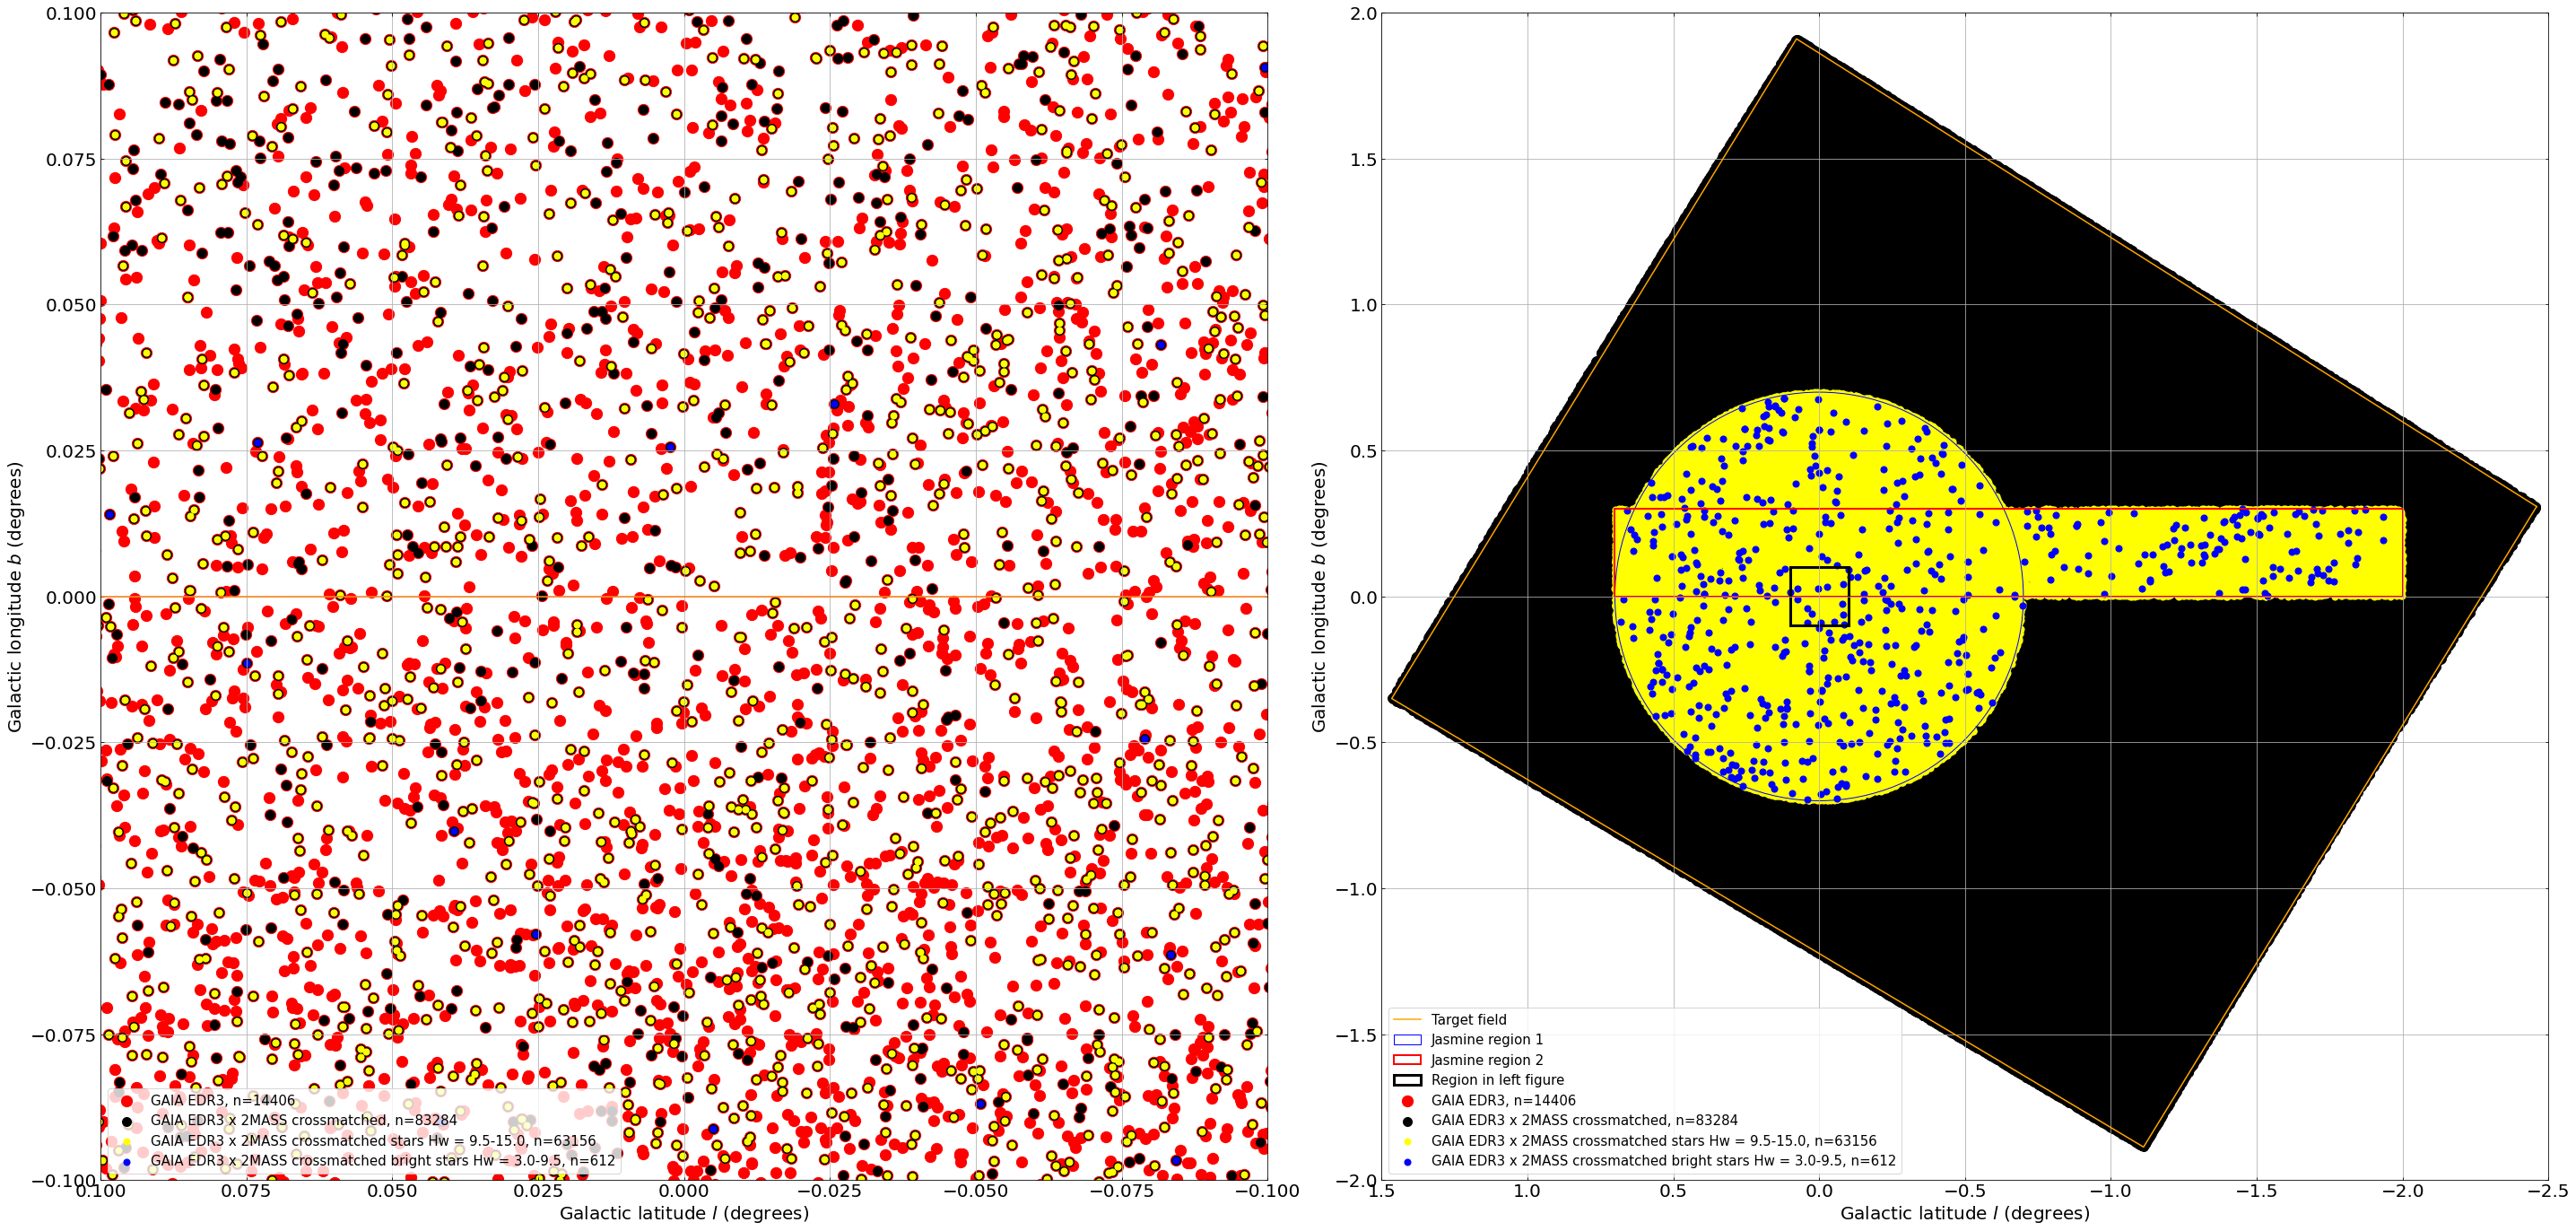

In [99]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax1.scatter(pd_gaia2mass["l"], pd_gaia2mass["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
#ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax1.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))

ax2.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax2.scatter(pd_gaia2mass["l"], pd_gaia2mass["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
#ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax2.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb.png")

In [40]:
def make_histogram(x, nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(15,15))
    ax = pp.axes()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.hist(pd_gaia2mass[x], bins=nbin, range=brange, label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.hist(pd_gaia2mass_jsky[x], bins=nbin, range=brange, label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.hist(pd_gaia2mass_t[x], bins=nbin, range=brange, label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.hist(pd_gaia2mass_jsky_t[x], bins=nbin, range=brange, label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.hist(pd_gaia2mass_b[x], bins=nbin, range=brange, label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.hist(pd_gaia2mass_jsky_b[x], bins=nbin, range=brange, label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.hist(pd_gaia2mass_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.hist(pd_gaia2mass_jsky_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))
    
    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel("Number of stars", fontsize=20)
    pp.show()
    fig.savefig("histgram.png")

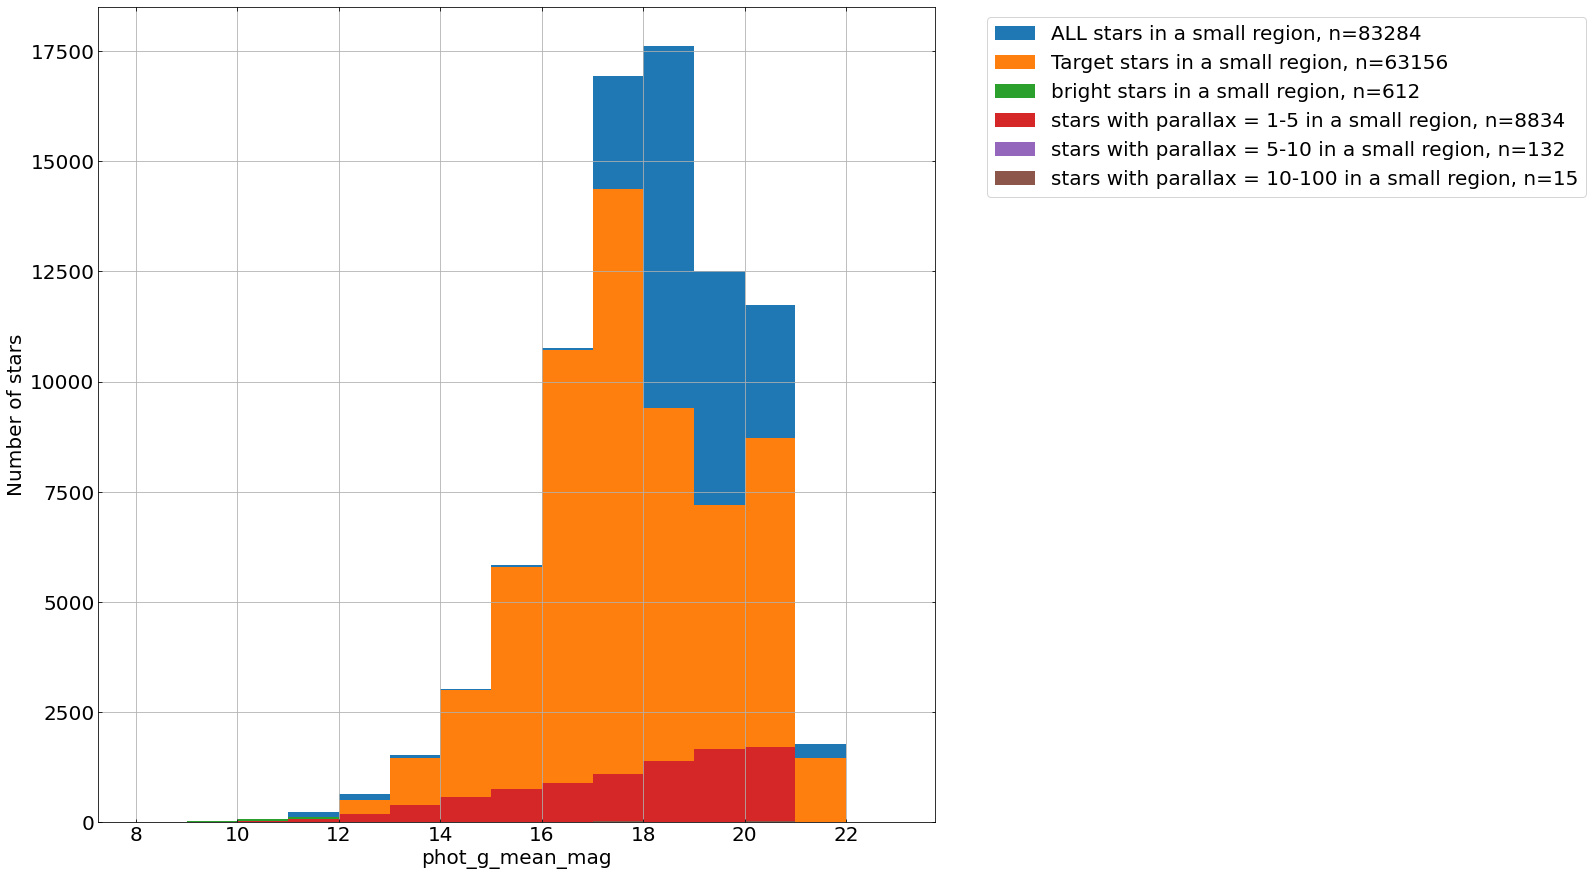

In [41]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 15
brange = (8, 23)
make_histogram("phot_g_mean_mag", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

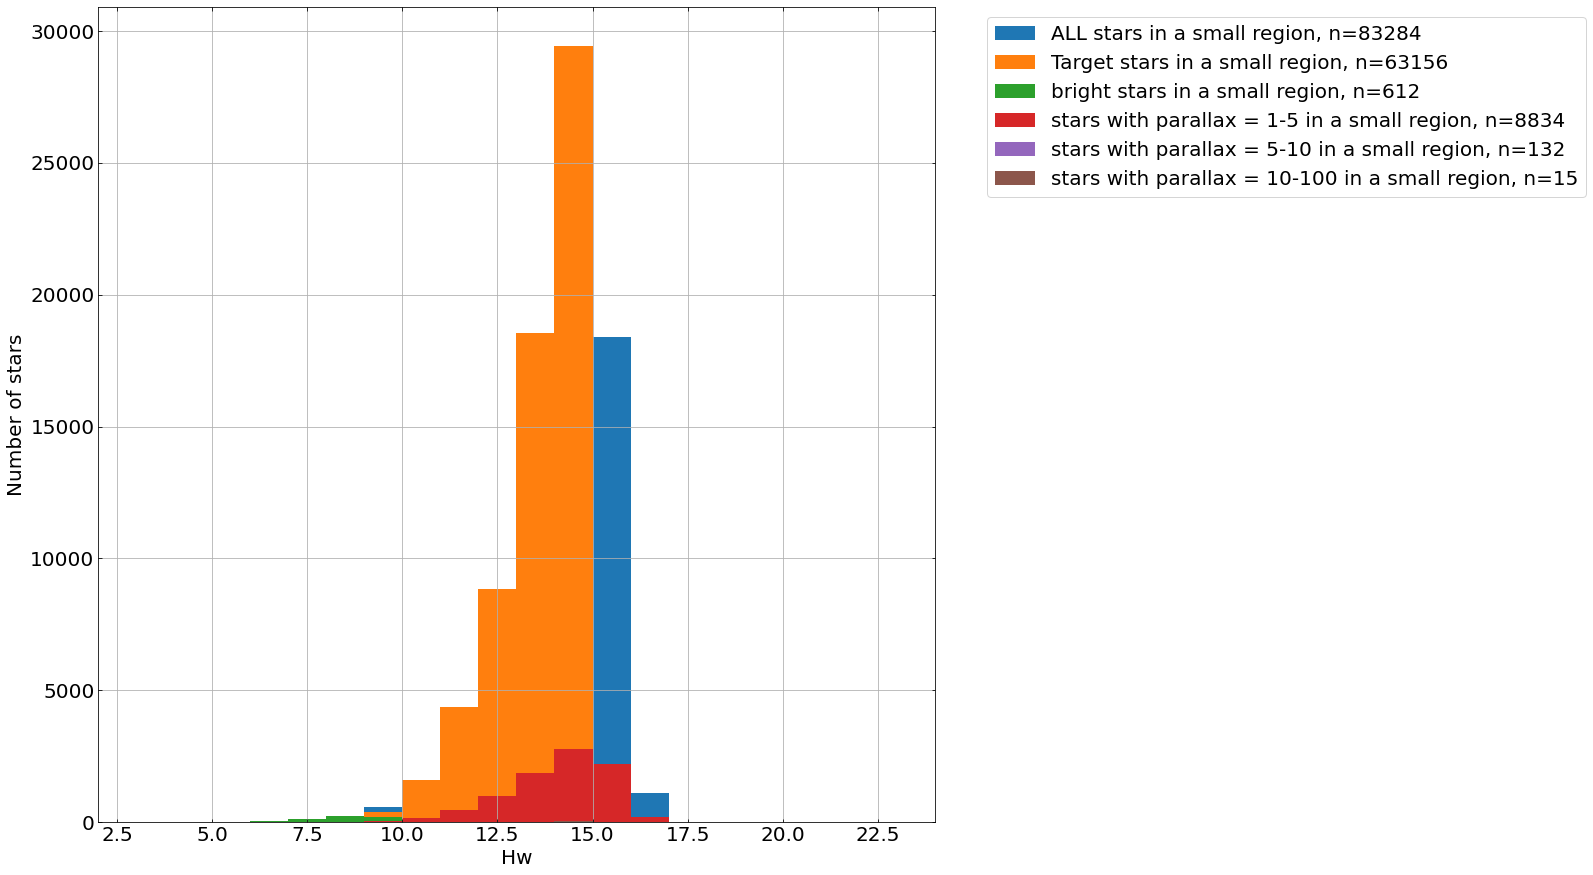

In [42]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 20
brange = (3, 23)
make_histogram("Hw", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

In [43]:
def make_figure(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(20,20))
    ax = pp.axes()
    ax.invert_yaxis()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    if x == "bp_rp" and y == "Mg": pp.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel(y, fontsize=20)
    pp.show()
    fig.savefig("plot.png")

In [96]:
def make_figure1(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    from astropy.table import QTable

    import numpy as np
    import matplotlib.pyplot as pp
    import matplotlib.patches as patches
    from matplotlib import gridspec

    region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
    region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

    ####

    lcenter = -0.5
    bcenter = 0
    ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
    sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
    width = 3
    height = 3
    sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
        [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

    sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
    sky1_l = sky1_radec.galactic.l.degree
    sky1_b = sky1_radec.galactic.b.degree
    sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

    fig = pp.figure(figsize=(30,15))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(2,4,3)

    ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax1.grid(True)
    # ax1.set_aspect('equal')
    ax1.invert_yaxis()

    if p1: ax1.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax1.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax1.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax1.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax1.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax1.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: ax1.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: ax1.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: ax1.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: ax1.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: ax1.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: ax1.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))
    
    if x == "bp_rp" and y == "Mg": 
        print("The Sun")
        ax1.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    if x == "distance" : ax1.set_xscale("log")
    if y == "distance" : ax1.set_yscale("log")

    ax1.legend(bbox_to_anchor=(1.04, 0.22), loc='upper left', fontsize=15)
    #ax1.legend(loc='upper right', fontsize=15)
    ax1.set_xlabel(x, fontsize=20)
    ax1.set_ylabel(y, fontsize=20)

    ###

    ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.set_xlim(1.5,-2.5)
    ax2.set_ylim(-2,2)
    ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
    ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

    r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
    ax2.add_patch(r1)
    r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
    ax2.add_patch(r2)
    ax2.plot(sky1_l, sky1_b, "orange", label="Target field")
    
    x = "l"
    y = "b"
    if p1: ax2.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax2.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax2.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax2.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax2.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax2.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: ax2.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: ax2.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: ax2.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: ax2.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: ax2.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: ax2.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    ax2.legend(loc="lower left", fontsize=15)
    ax2.legend(bbox_to_anchor=(-0.1525, -0.1), loc='upper left', fontsize=15)
    
    fig.subplots_adjust(left=0.035, right=0.98, bottom=0.05, top=0.98, wspace=0.15)

    #fig.tight_layout()
    pp.show()

    fig.savefig("plot.png")
 

The Sun


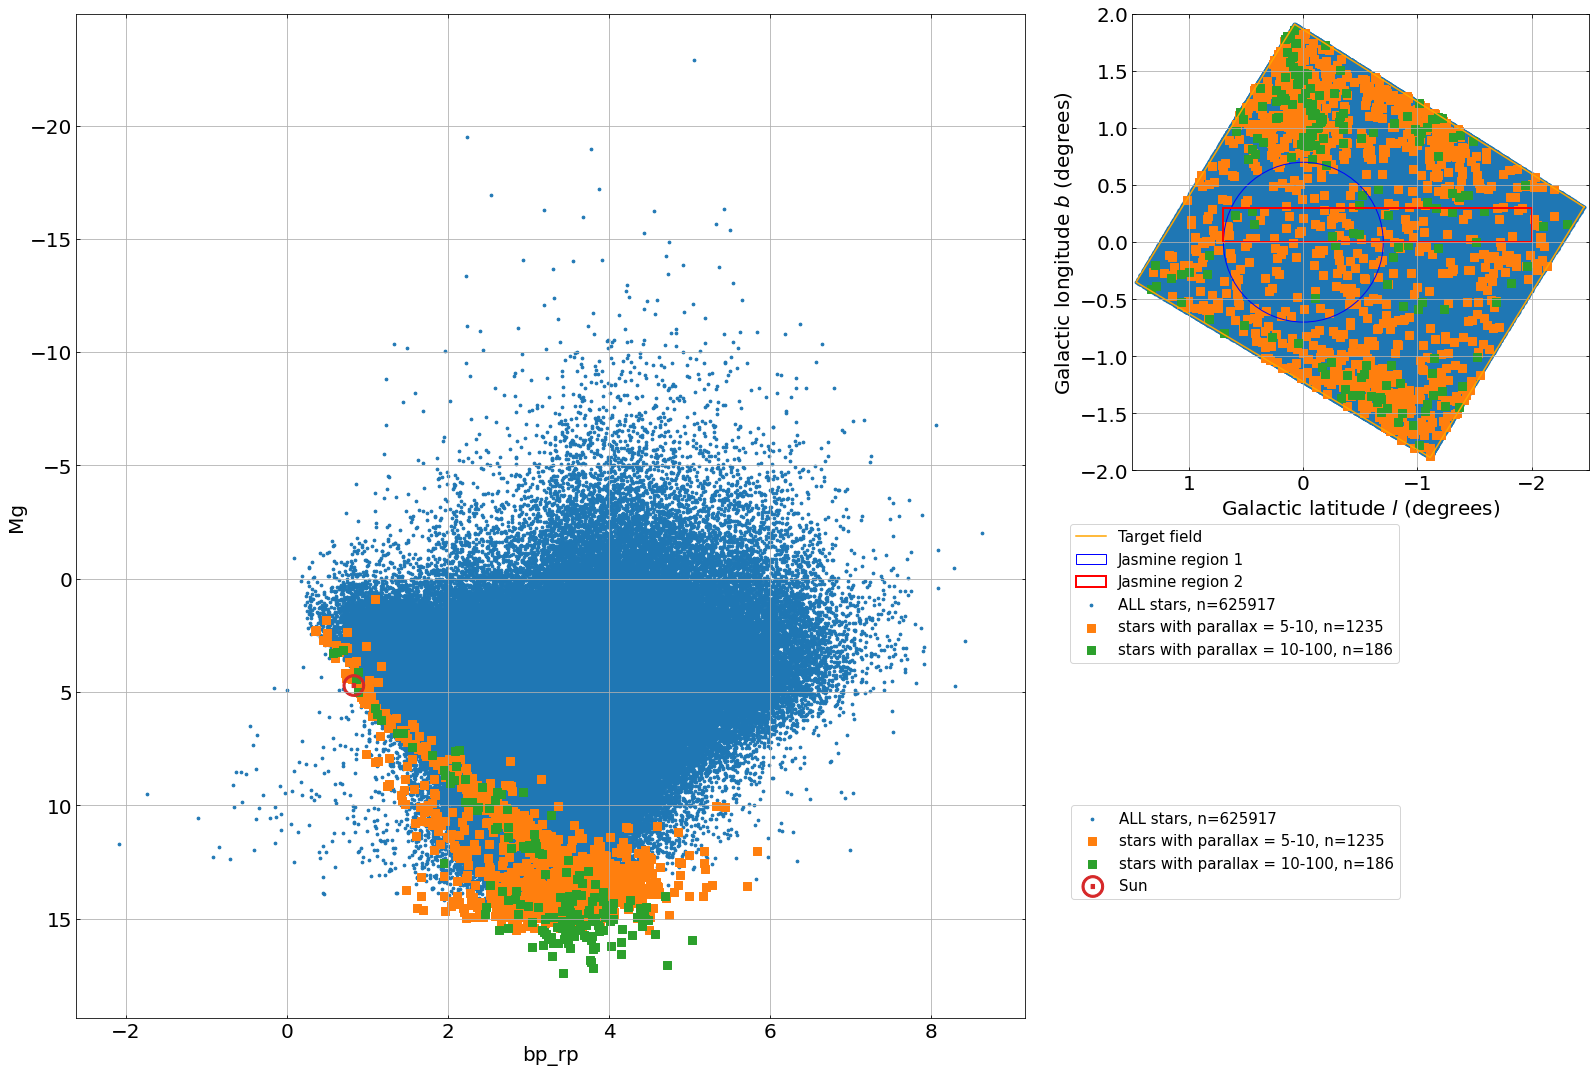

In [97]:
p1 = True   # ALL stars
p2 = False  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

The Sun


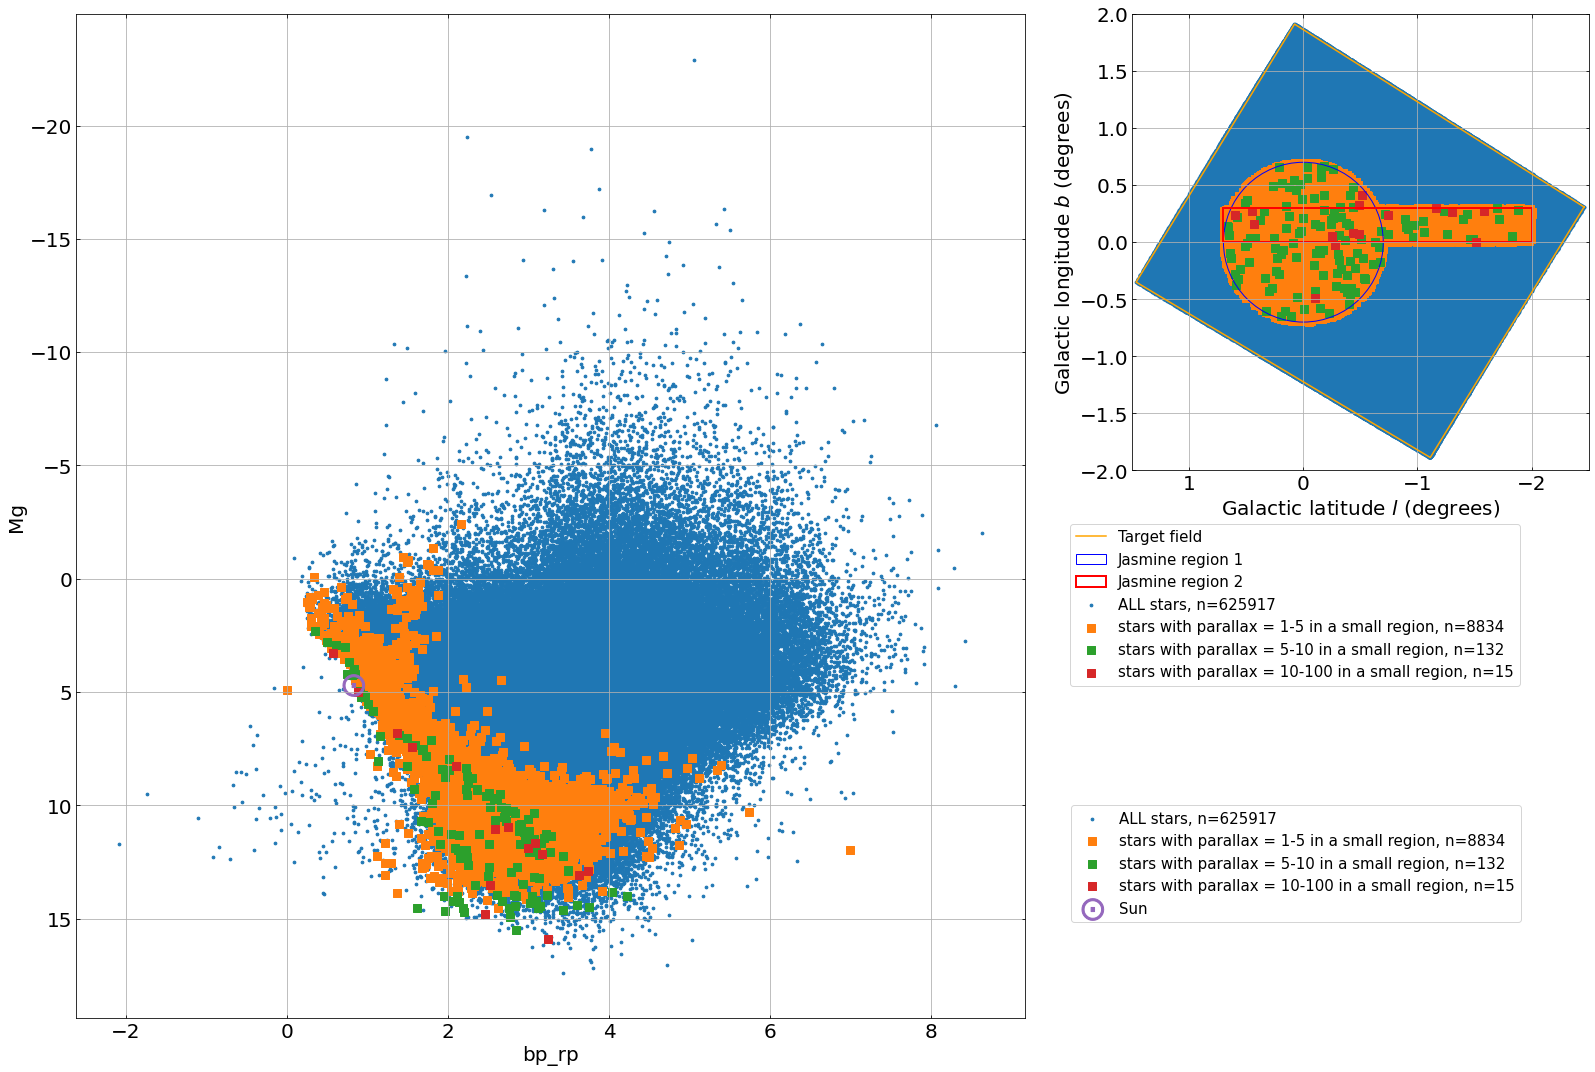

In [98]:
p1 = True   # ALL stars
p2 = False  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

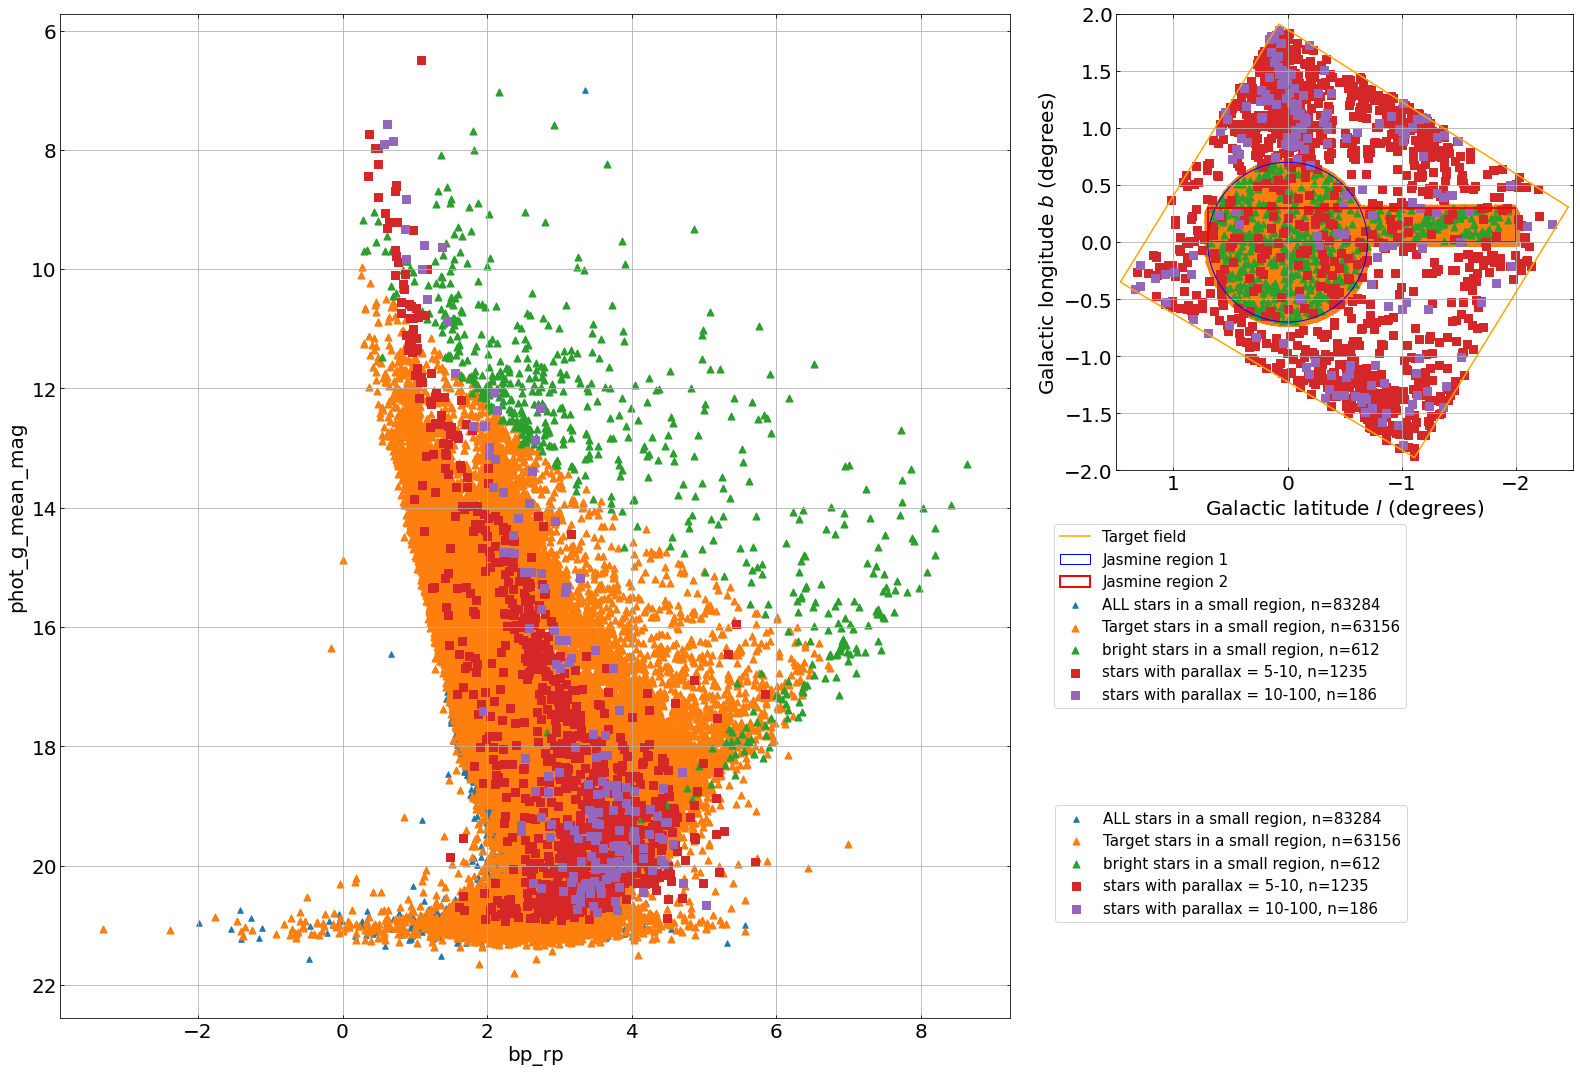

In [47]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

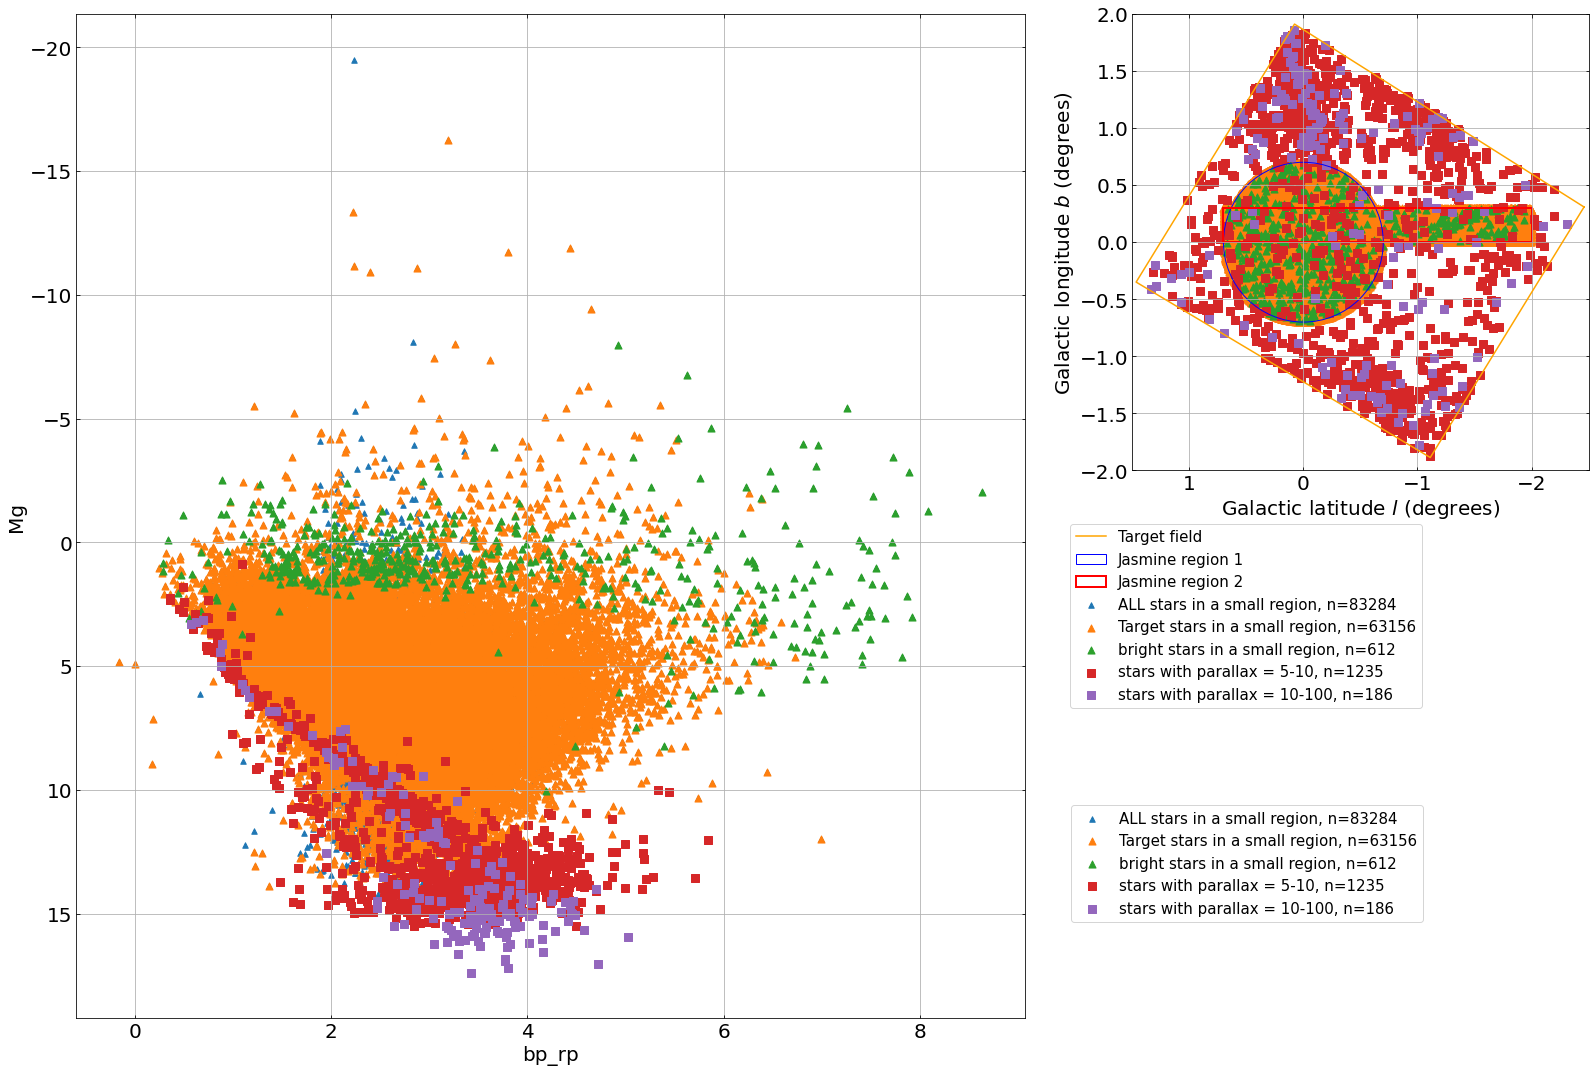

In [48]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

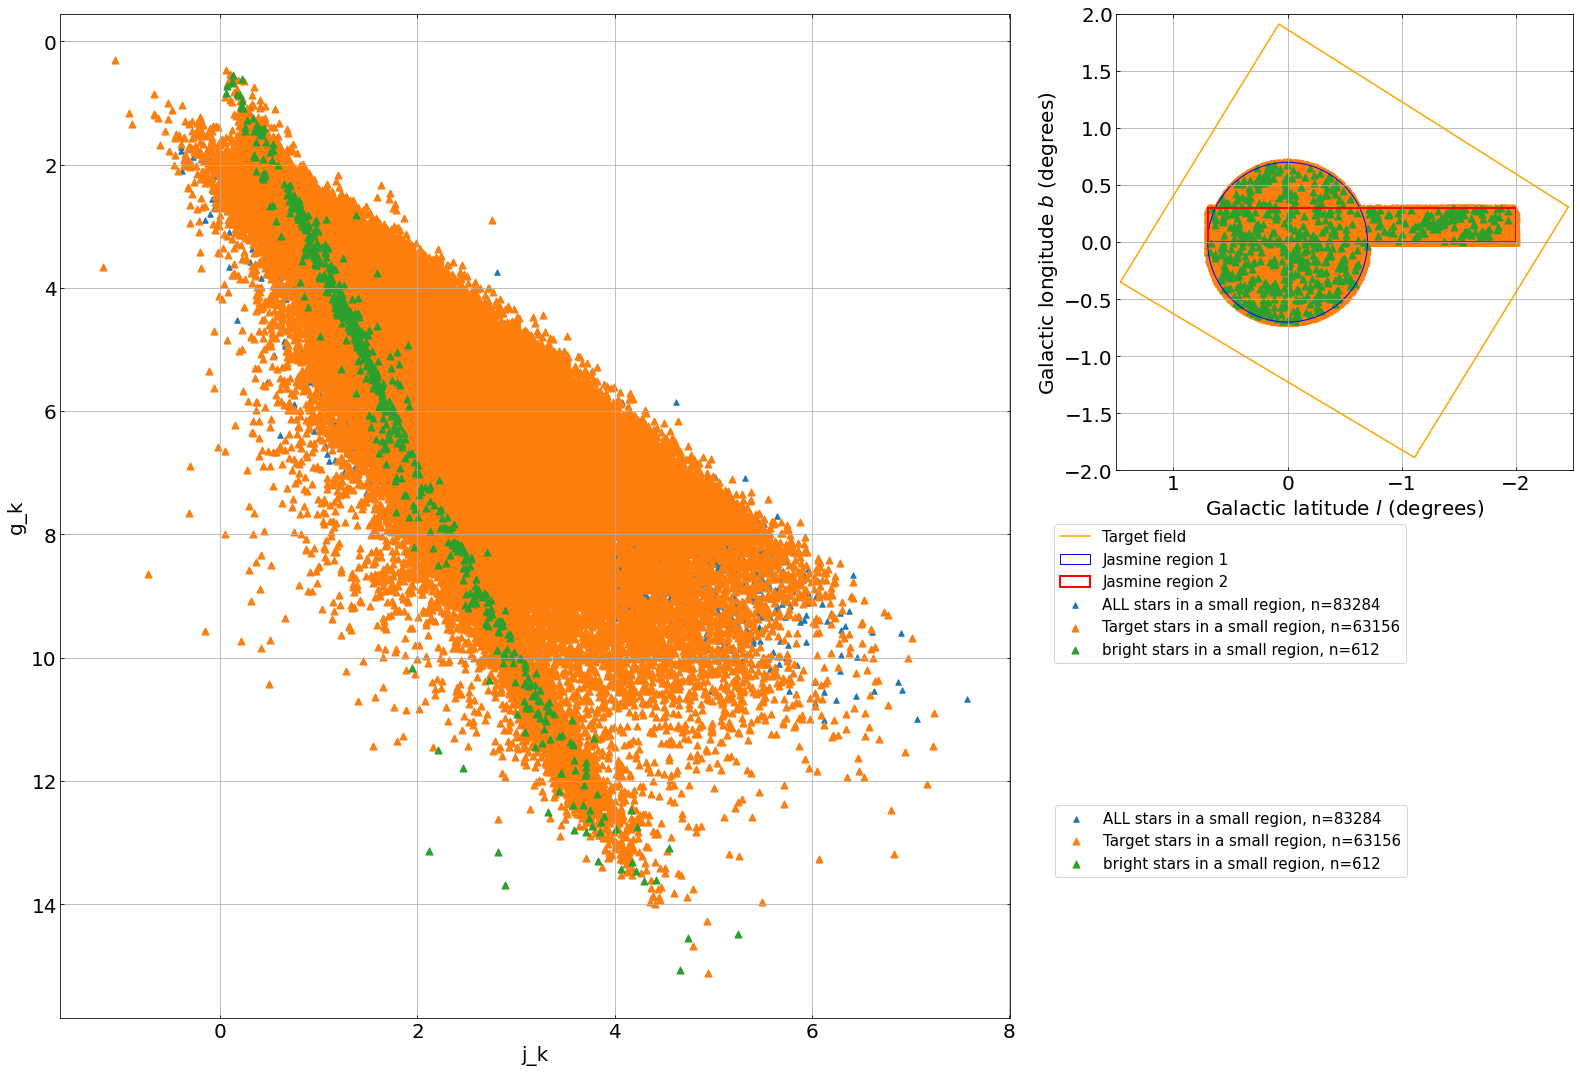

In [49]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("j_k", "g_k", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

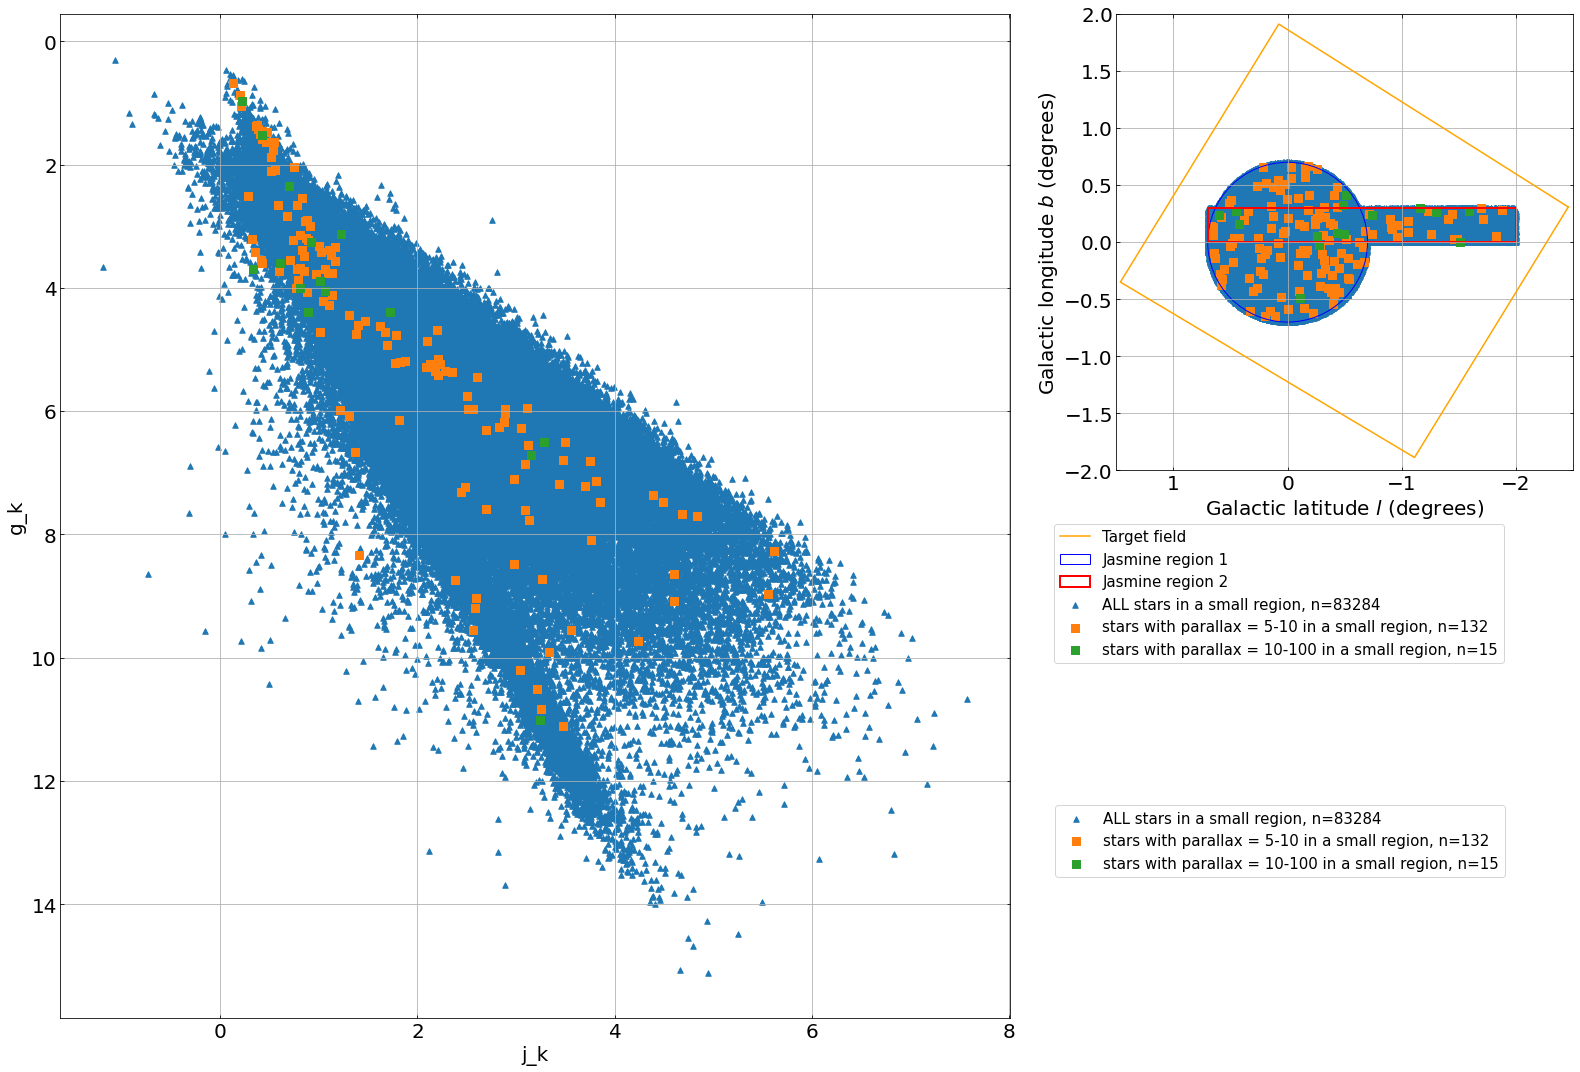

In [50]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "g_k", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

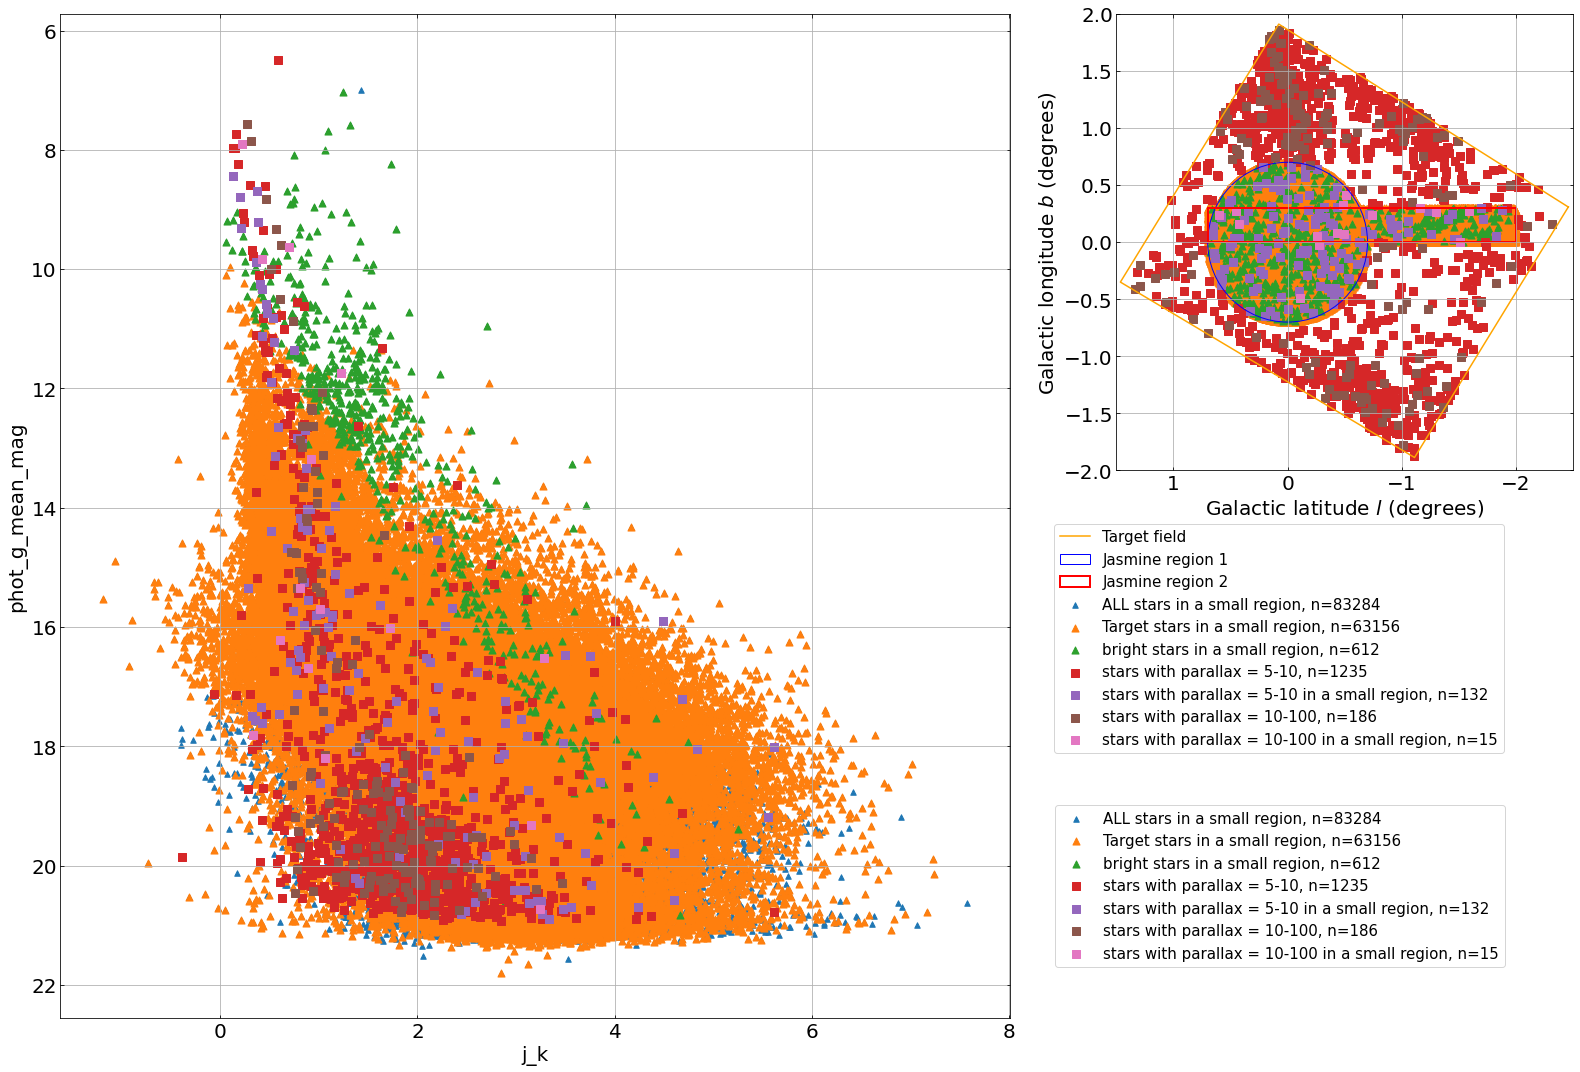

In [51]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

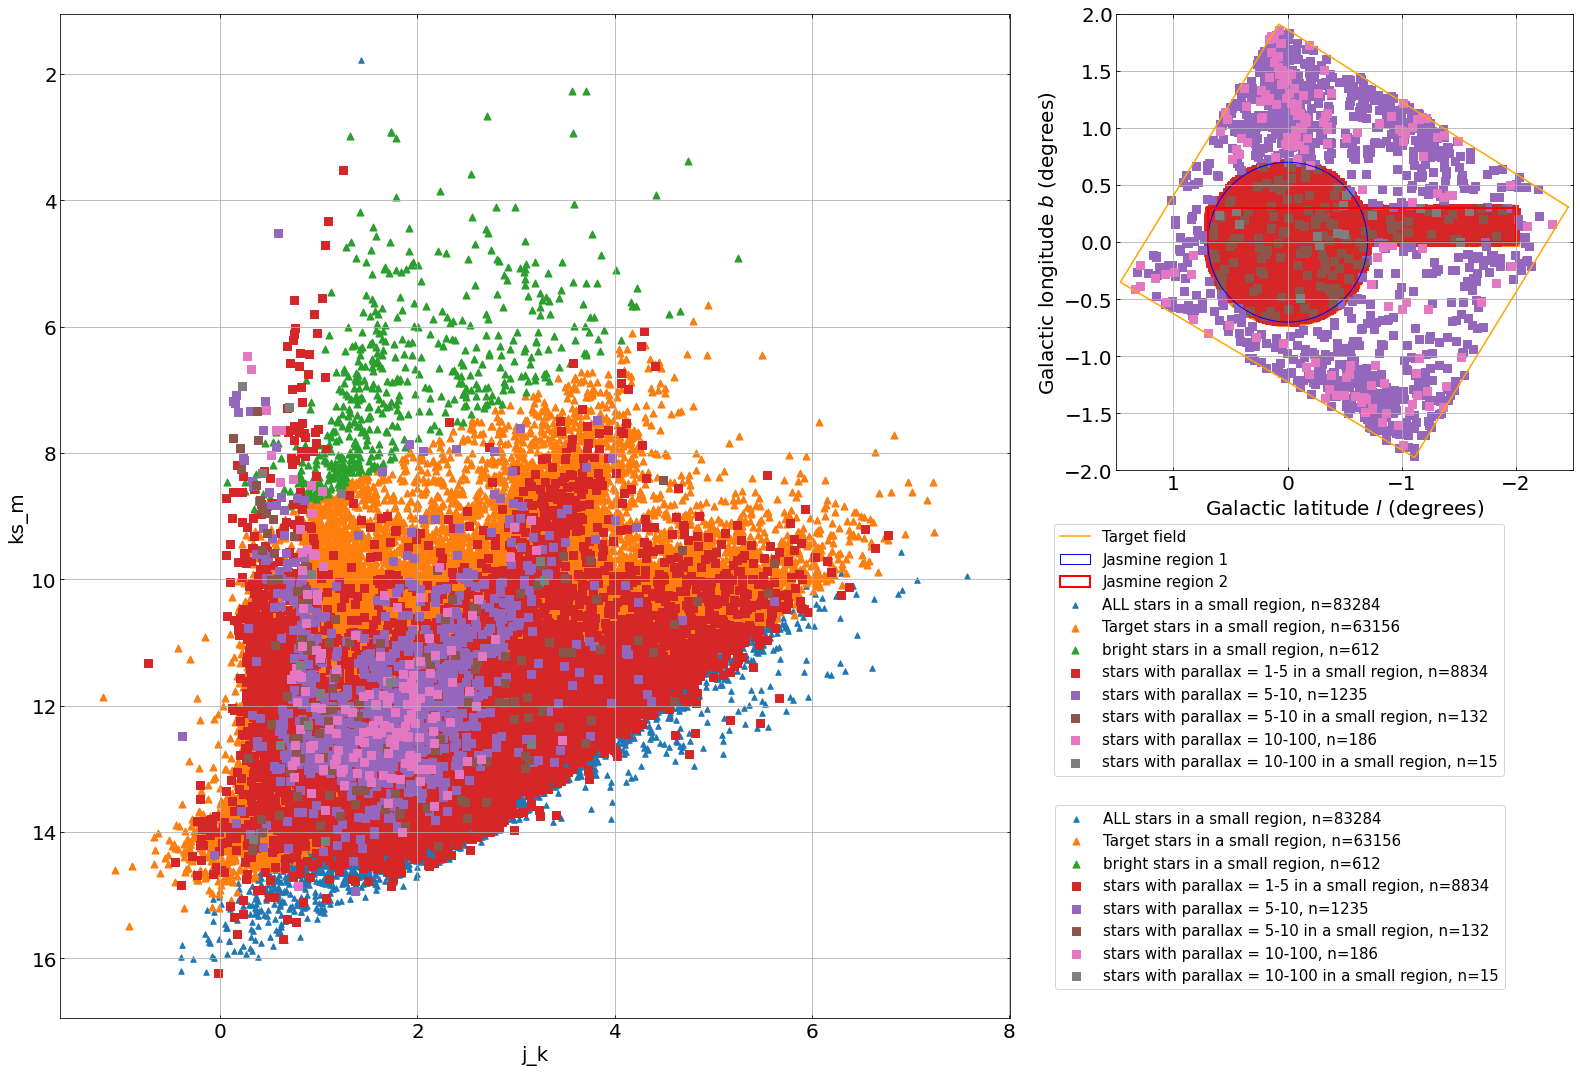

In [52]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 15-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "ks_m", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

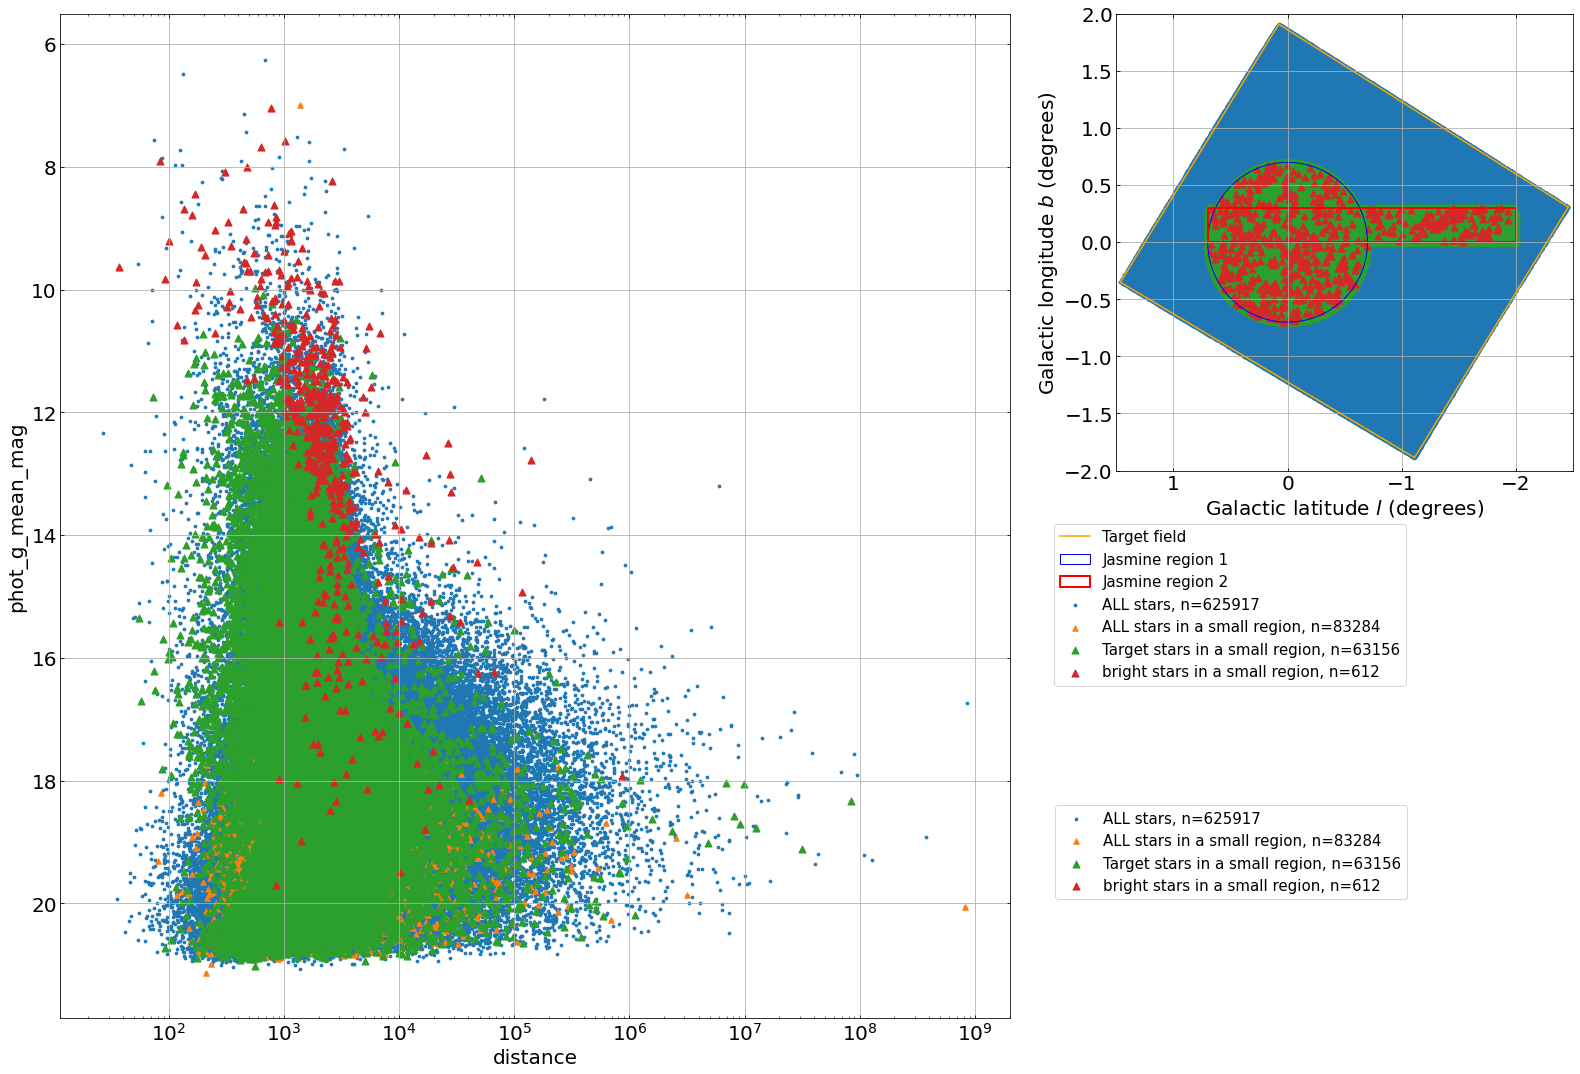

In [106]:
p1 = True   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("distance", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

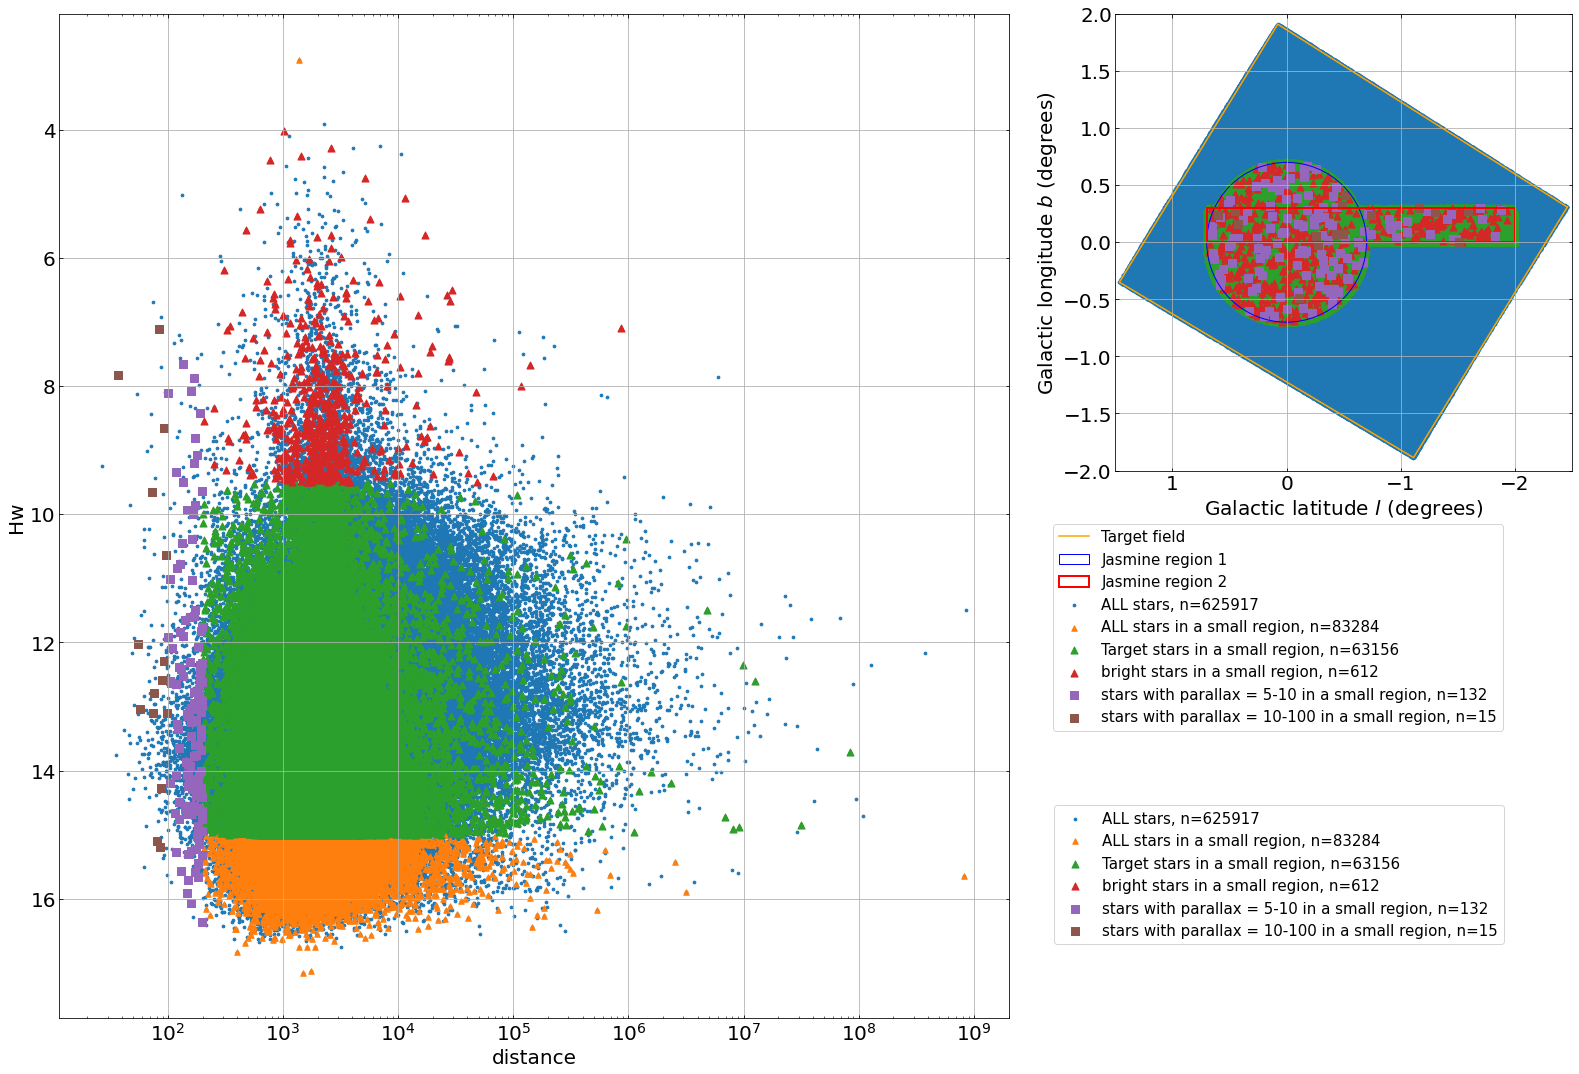

In [107]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-10
p8 = False   # stars with parallax = 1-10 in a small region
p9 = False   # stars with parallax = 10-100
p10 = True  # stars with parallax = 10-100 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("distance", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

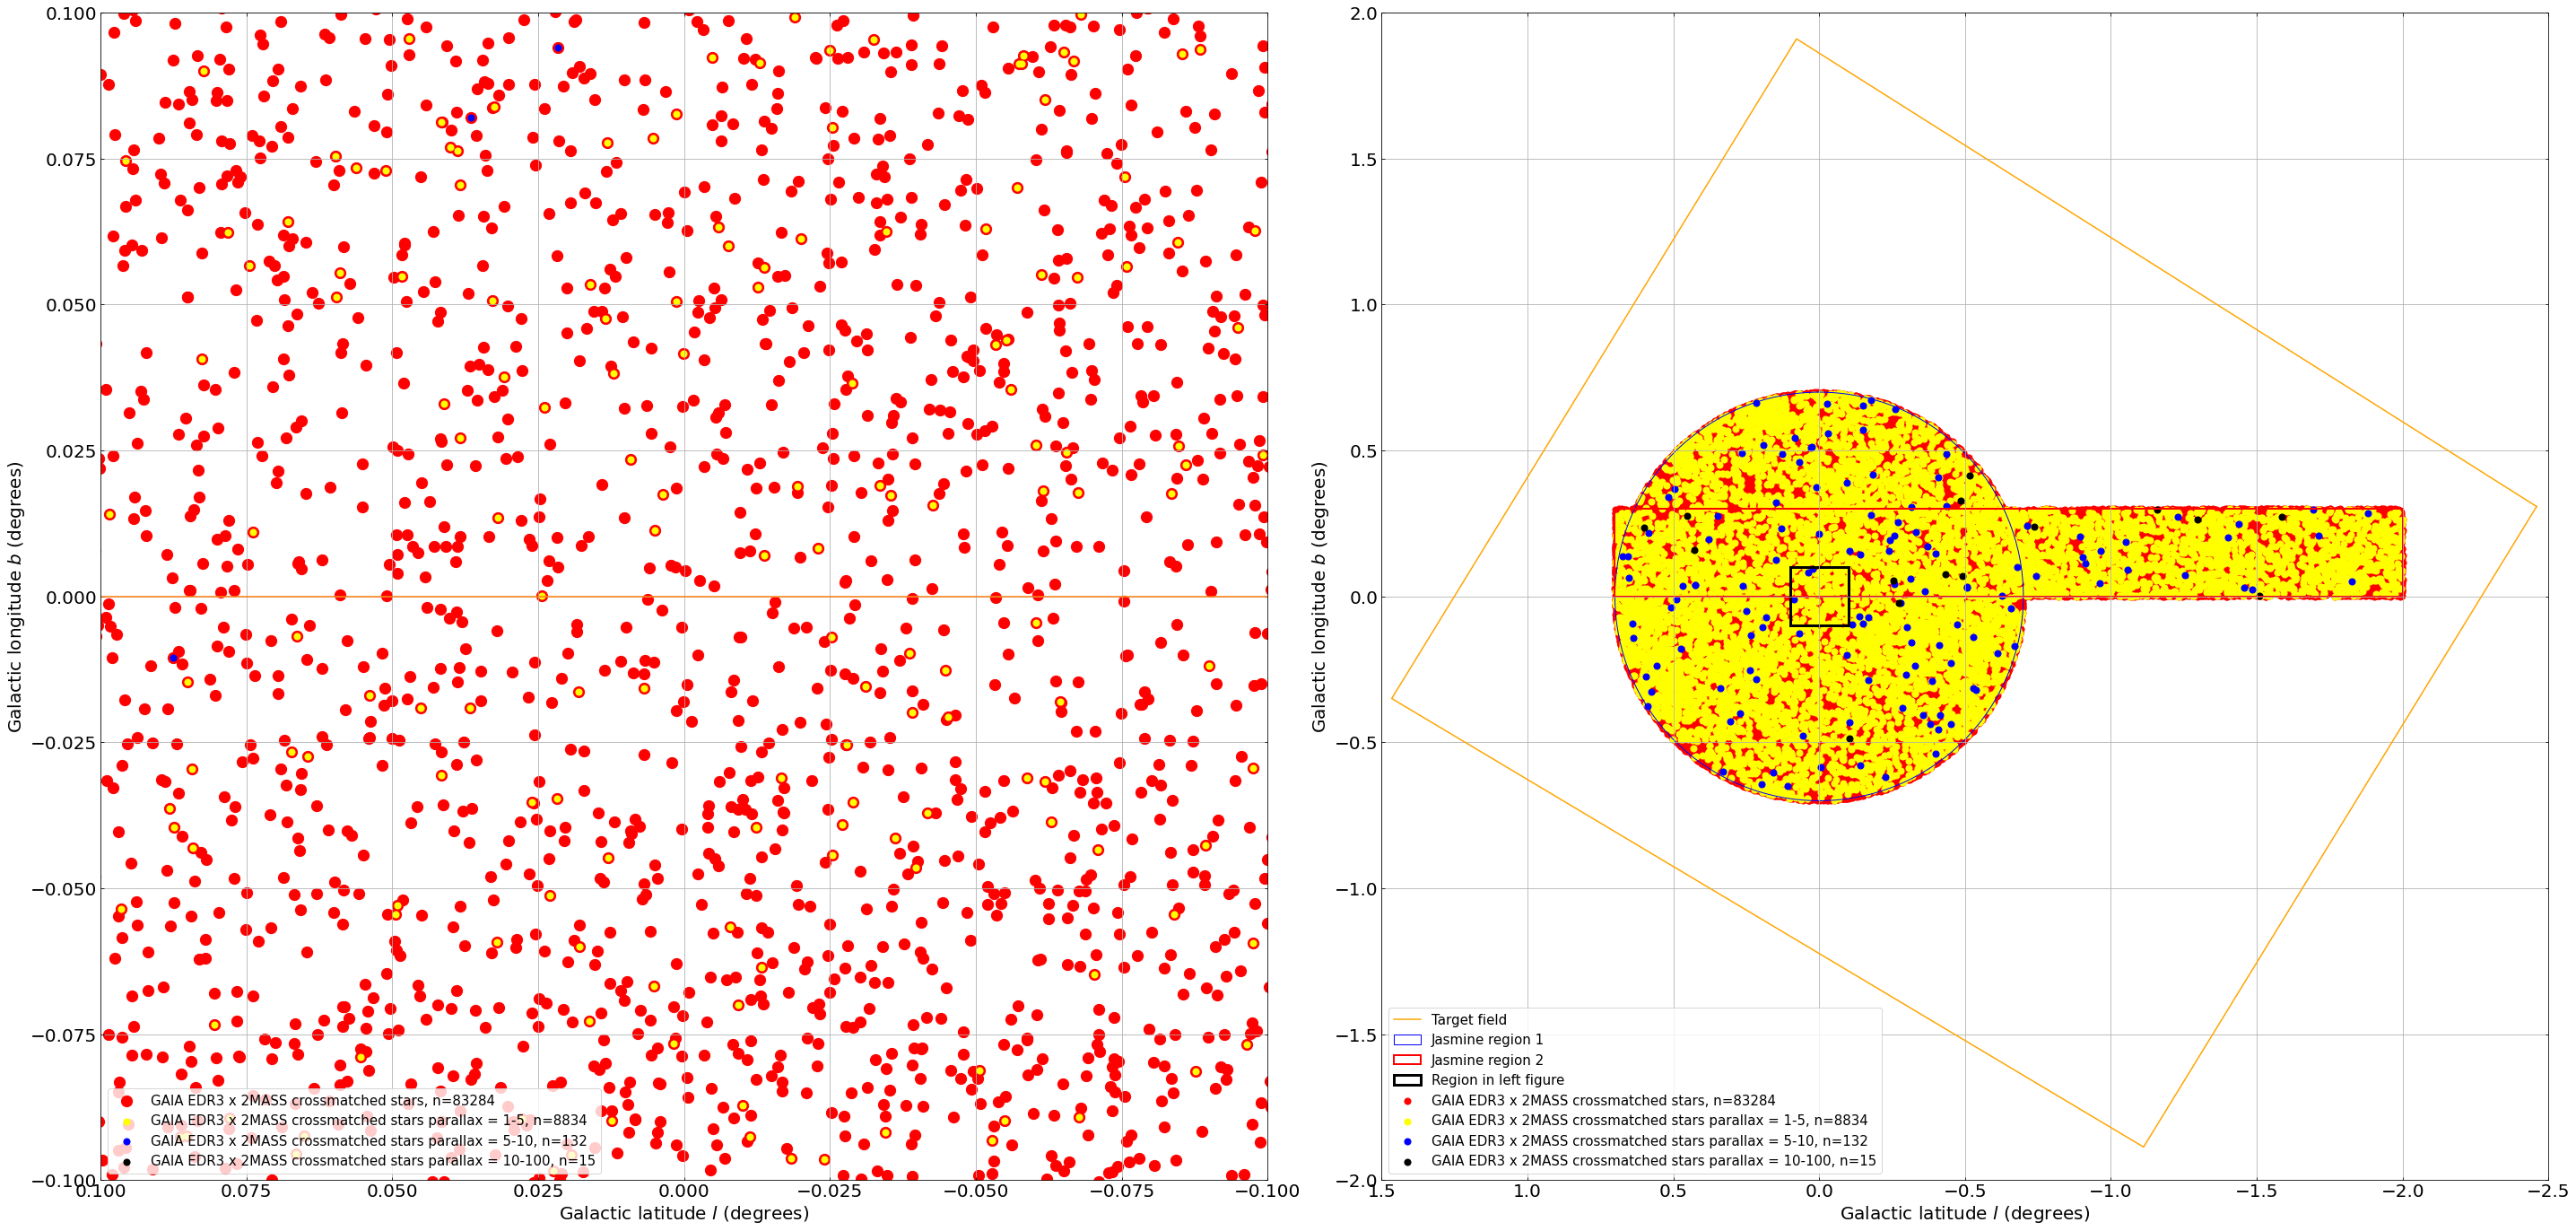

In [55]:
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=150, c="red", label="GAIA EDR3 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax1.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax1.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))

ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=50, c="red", label="GAIA EDR3 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax2.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax2.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA EDR3 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
#fig.savefig("fov_lb.png"))))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb.png")

In [56]:
pd_gaia2mass_jsky_m

solution_id                    designation  \
161800  1636042515805110273  Gaia EDR3 4057569236490414208   
163178  1636042515805110273  Gaia EDR3 4057573802035360896   
165655  1636042515805110273  Gaia EDR3 4057581743434796416   
257052  1636042515805110273  Gaia EDR3 4056961889452668288   
262653  1636042515805110273  Gaia EDR3 4056967490090373760   
298765  1636042515805110273  Gaia EDR3 4057072188510525312   
317940  1636042515805110273  Gaia EDR3 4056929217651884928   
318093  1636042515805110273  Gaia EDR3 4057095072096565632   
318785  1636042515805110273  Gaia EDR3 4057096446482441088   
323209  1636042515805110273  Gaia EDR3 4057103902549306752   
323743  1636042515805110273  Gaia EDR3 4057104688524235136   
328399  1636042515805110273  Gaia EDR3 4056936566324422784   
346061  1636042515805110273  Gaia EDR3 4057146985361182464   
347095  1636042515805110273  Gaia EDR3 4057150047678113536   
394674  1636042515805110273  Gaia EDR3 4057277350545375616   

                  source_id  random_index  ref_epoch          ra  ra_error  \
161800  4057569236490414208      11316228     2016.0  266.504068  0.014784   
163178  4057573802035360896    1146676834     2016.0  266.405565  0.080569   
165655  4057581743434796416     885427586     2016.0  266.531197  0.034113   
257052  4056961889452668288    1242715627     2016.0  265.364055  0.615661   
262653  4056967490090373760    1721529768     2016.0  265.416257  0.044451   
298765  4057072188510525312     408258460     2016.0  265.729525  0.014281   
317940  4056929217651884928     272346884     2016.0  265.180697  1.609703   
318093  4057095072096565632    1341341860     2016.0  266.044438  0.053967   
318785  4057096446482441088     729683904     2016.0  266.072276  0.015951   
323209  4057103902549306752      71928867     2016.0  266.262999  0.068521   
323743  4057104688524235136     653297824     2016.0  266.200800  0.149142   
328399  4056936566324422784     332054307     2016.0  265.491031  0.124488   
346061  4057146985361182464     918300407     2016.0  265.795121  0.015036   
347095  4057150047678113536     551104150     2016.0  265.693014  0.839503   
394674  4057277350545375616     110988093     2016.0  266.819411  0.036964   

              dec  dec_error   parallax  parallax_error  parallax_over_error  \
161800 -28.487362   0.012143  27.298865        0.018898          1444.505100   
163178 -28.407688   0.061874  12.006552        0.083181           144.342830   
165655 -28.301671   0.026358  18.242575        0.039691           459.616520   
257052 -29.902062   0.436968  11.676347        0.759055            15.382740   
262653 -29.766998   0.034331  10.132645        0.049513           204.645370   
298765 -29.440020   0.010658  10.452364        0.015811           661.063800   
317940 -30.142829   1.597619  10.772314        2.720756             3.959310   
318093 -29.318562   0.043436  13.562108        0.062126           218.300960   
318785 -29.264108   0.013214  13.622186        0.020909           651.489700   
323209 -29.181509   0.054624  13.193461        0.083918           157.219000   
323743 -29.125674   0.112963  17.538844        0.179253            97.844154   
328399 -30.219838   0.098640  11.422812        0.163926            69.682755   
346061 -29.177505   0.011809  10.804706        0.017314           624.055100   
347095 -29.159227   0.672923  12.367023        0.875636            14.123476   
394674 -29.278316   0.028057  11.160312        0.041350           269.898560   

                pm        pmra  pmra_error       pmdec  pmdec_error  \
161800  127.155800   -3.491541    0.017696 -127.107851     0.011562   
163178   50.611446    0.369227    0.093381  -50.610099     0.059193   
165655   91.554140   -9.974207    0.044850  -91.009206     0.026289   
257052   11.459883    6.337210    0.815684    9.548230     0.424806   
262653  125.459810   18.555155    0.061013 -124.080097     0.031304   
298765   51.903664  -12.844410    0.019482  -50.289279     0.009977

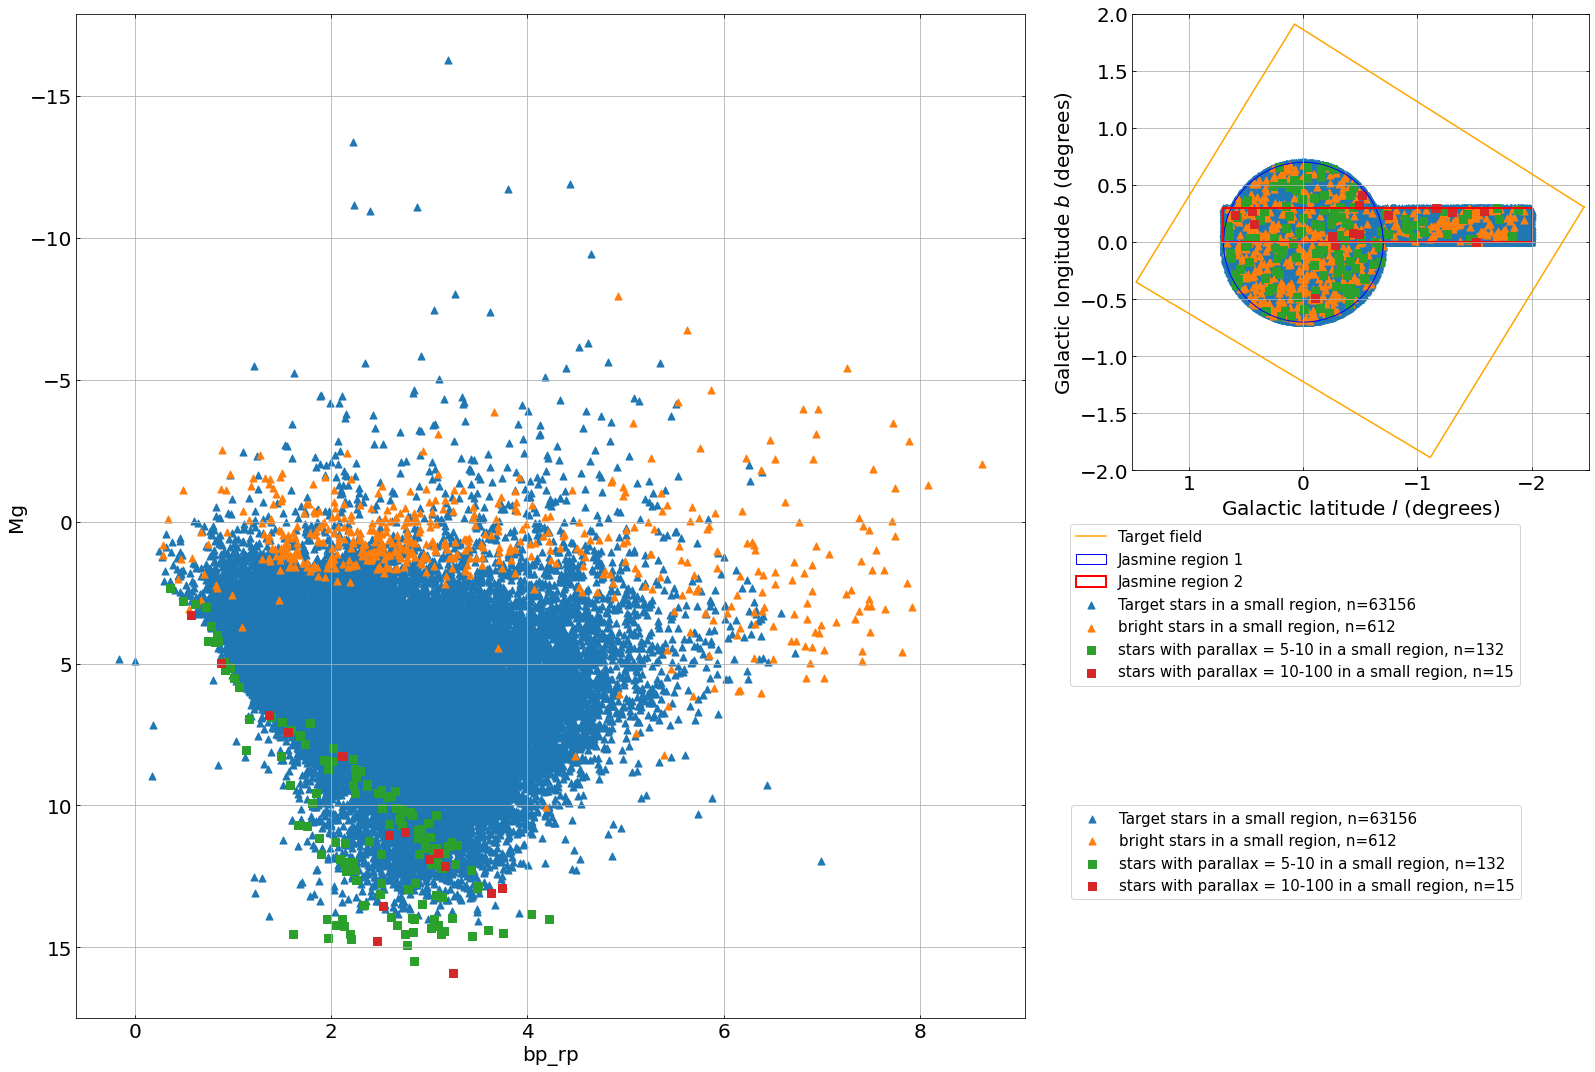

In [57]:
p1 = False  # ALL stars
p2 = False  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

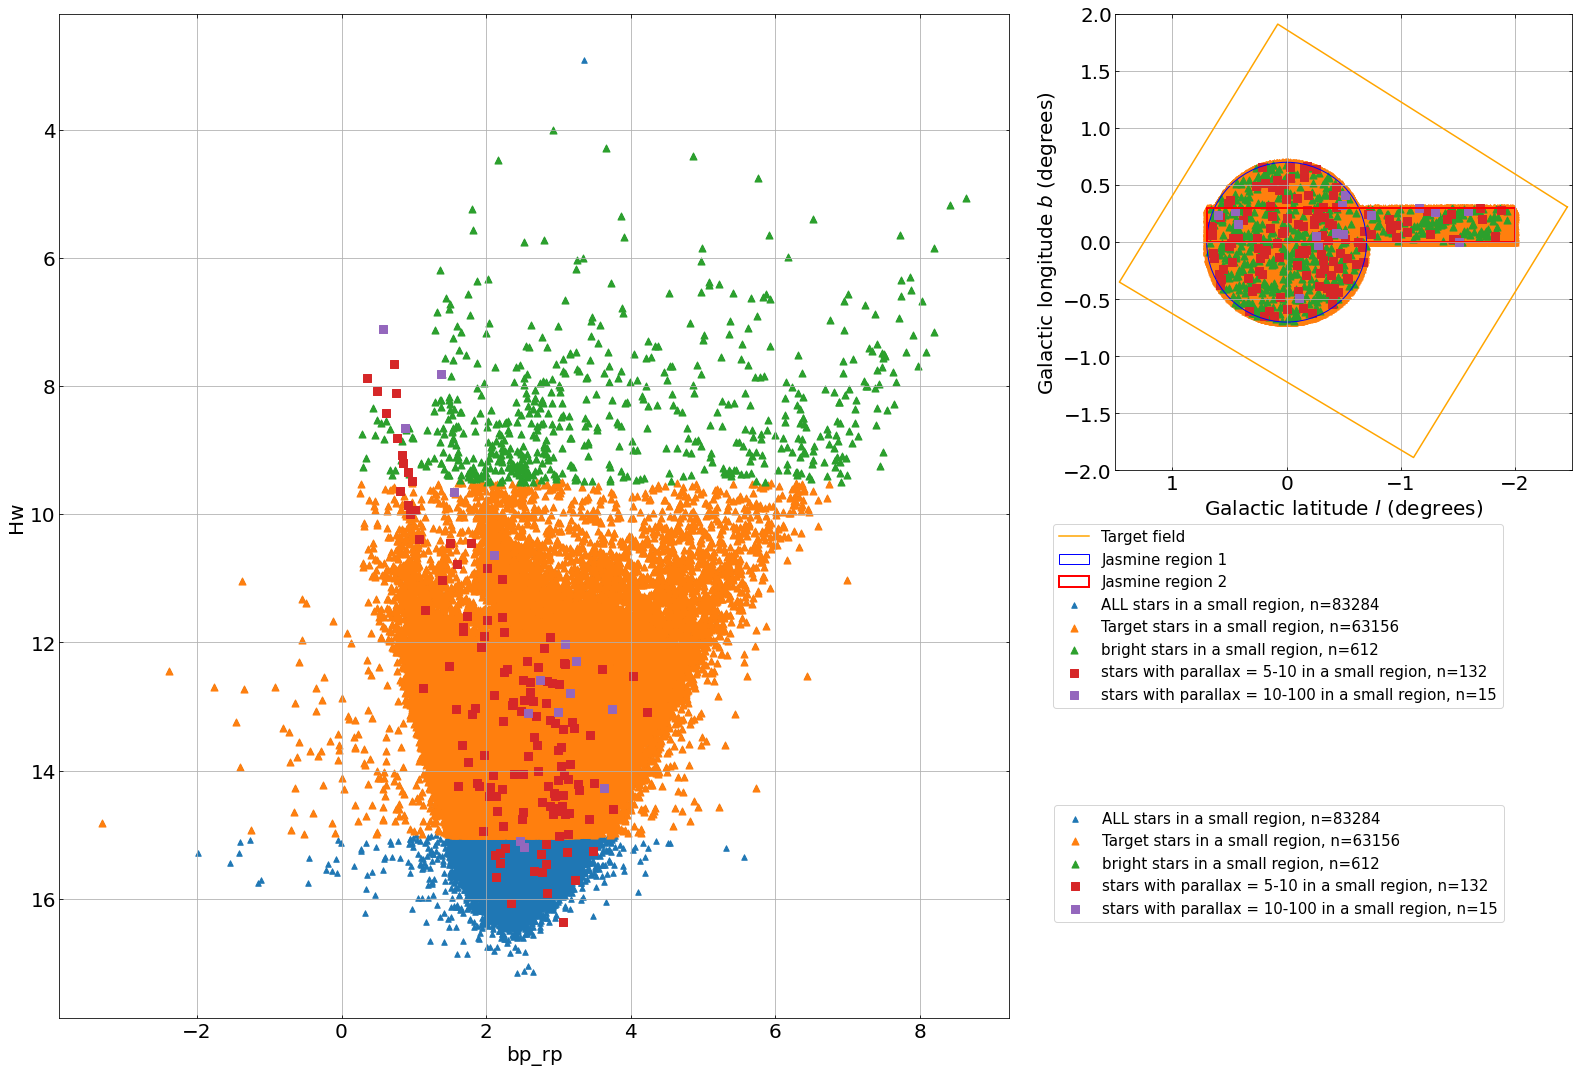

In [59]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

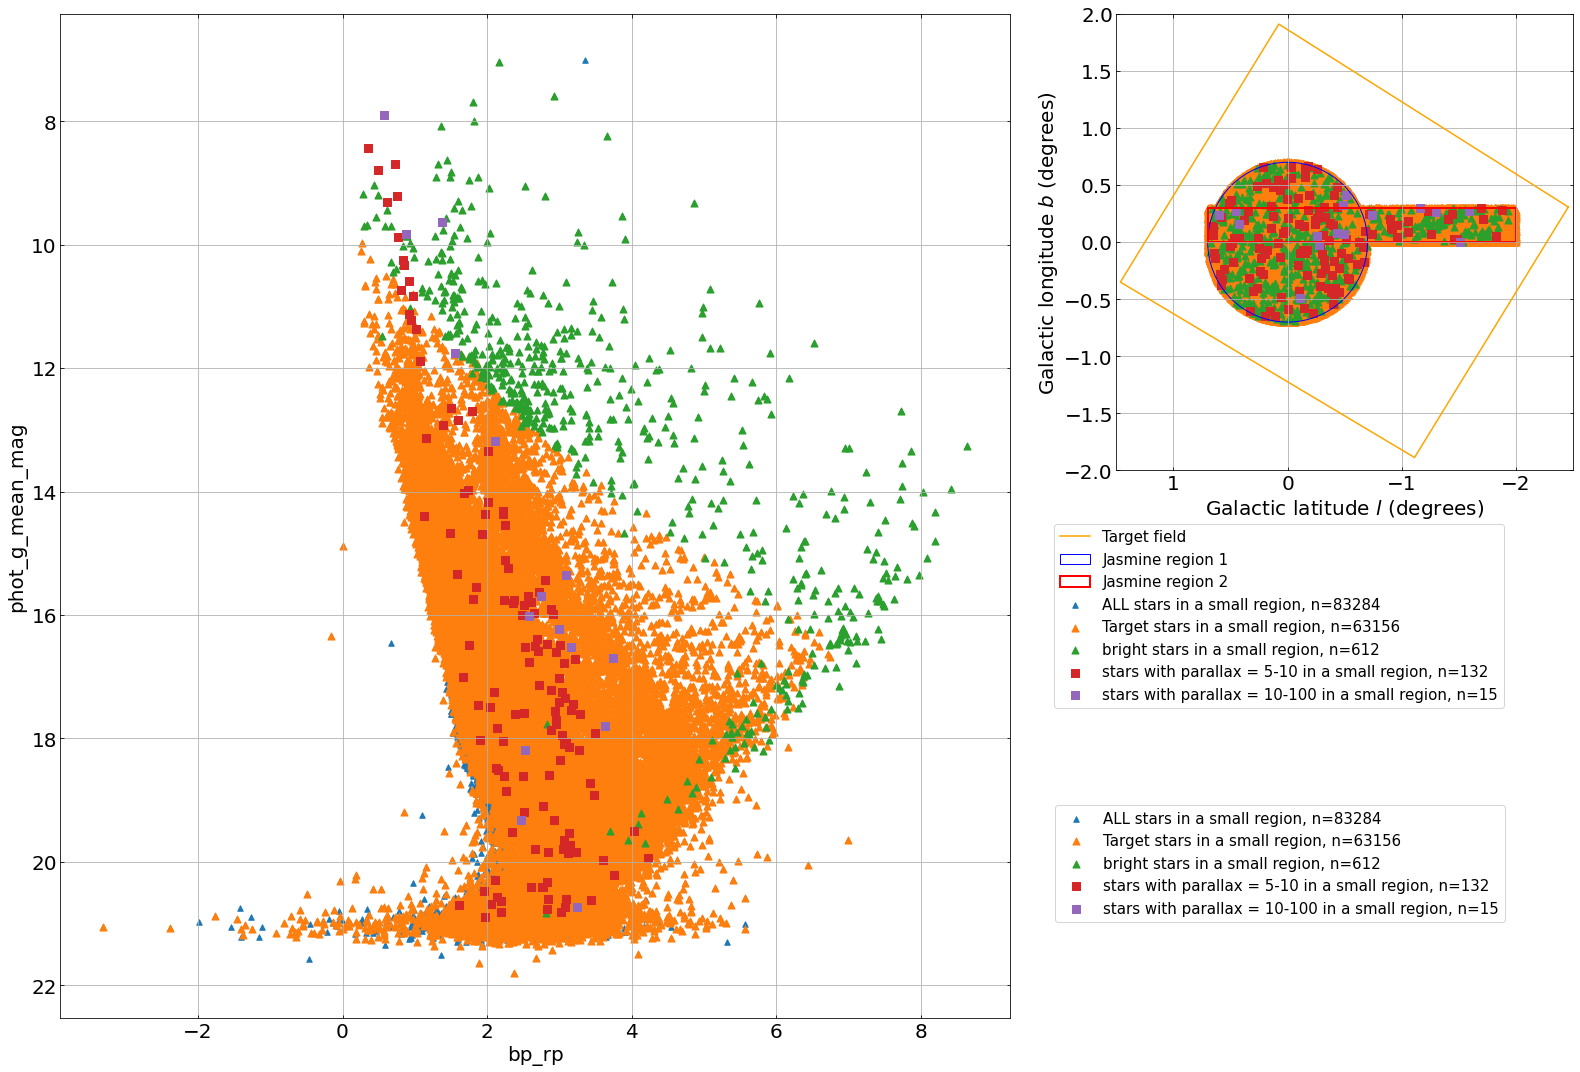

In [75]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

bp_rp TRAPPIST-1 = 4.901851  
bp_rp VB8 (M7V) = 4.728976  
bp_rp GJ625 (M1.5V) = 2.295460  
bp_rp GJ96 (M0V) = 1.981323  

In [72]:
pd.set_option('display.max_rows', 200)
pd_gaia2mass_jsky_m[["designation", "ra", "dec", "parallax", "parallax_over_error", "phot_g_mean_mag", "bp_rp", "Hw"]]

designation          ra        dec   parallax  \
161800  Gaia EDR3 4057569236490414208  266.504068 -28.487362  27.298865   
163178  Gaia EDR3 4057573802035360896  266.405565 -28.407688  12.006552   
165655  Gaia EDR3 4057581743434796416  266.531197 -28.301671  18.242575   
257052  Gaia EDR3 4056961889452668288  265.364055 -29.902062  11.676347   
262653  Gaia EDR3 4056967490090373760  265.416257 -29.766998  10.132645   
298765  Gaia EDR3 4057072188510525312  265.729525 -29.440020  10.452364   
317940  Gaia EDR3 4056929217651884928  265.180697 -30.142829  10.772314   
318093  Gaia EDR3 4057095072096565632  266.044438 -29.318562  13.562108   
318785  Gaia EDR3 4057096446482441088  266.072276 -29.264108  13.622186   
323209  Gaia EDR3 4057103902549306752  266.262999 -29.181509  13.193461   
323743  Gaia EDR3 4057104688524235136  266.200800 -29.125674  17.538844   
328399  Gaia EDR3 4056936566324422784  265.491031 -30.219838  11.422812   
346061  Gaia EDR3 4057146985361182464  265.795121 -29.177505  10.804706   
347095  Gaia EDR3 4057150047678113536  265.693014 -29.159227  12.367023   
394674  Gaia EDR3 4057277350545375616  266.819411 -29.278316  11.160312   

        parallax_over_error  phot_g_mean_mag     bp_rp         Hw  
161800          1444.505100         9.625441  1.370467   7.820411  
163178           144.342830         7.900692  0.569479   7.114756  
165655           459.616520        15.352707  3.085536  12.027892  
257052            15.382740        18.192667  2.525049  15.192903  
262653           204.645370        16.023544  2.585546  13.094944  
298765           661.063800        13.178037  2.106294  10.640664  
317940             3.959310        20.726475  3.241348  12.284788  
318093           218.300960        16.220884  2.993941  13.094089  
318785           651.489700        11.746120  1.559120   9.657822  
323209           157.219000        16.525112  3.162663  12.783157  
323743            97.844154        16.694687  3.743557  13.032433  
328399            69.682755        17.802597  3.625828  14.278170  
346061           624.055100         9.824229  0.878571   8.656439  
347095            14.123476        19.314590  2.463007  15.091620  
394674           269.898560        15.698416  2.748387  12.586658

In [73]:
pd_gaia2mass_jsky_n[["designation", "ra", "dec", "parallax", "parallax_over_error", "phot_g_mean_mag", "bp_rp", "Hw"]]

designation          ra        dec  parallax  \
131183  Gaia EDR3 4057492270676391296  266.602758 -28.750032  5.839361   
132097  Gaia EDR3 4057494607137709312  266.370161 -28.743445  6.797999   
132527  Gaia EDR3 4057495809721590144  266.523599 -28.693931  5.556616   
133805  Gaia EDR3 4057498210609016576  266.808753 -28.900043  9.676951   
134041  Gaia EDR3 4057498519853579648  266.793172 -28.864865  5.449801   
135453  Gaia EDR3 4057500448291024256  266.913971 -28.810553  5.495384   
137170  Gaia EDR3 4057502814814109952  266.675162 -28.805925  5.144000   
140768  Gaia EDR3 4057508896485748608  267.118608 -28.628249  5.436191   
141133  Gaia EDR3 4057509519264376448  267.064089 -28.612011  5.036538   
142129  Gaia EDR3 4057511645264841344  266.859669 -28.622807  8.150835   
142755  Gaia EDR3 4057512813510341120  267.025899 -28.570073  7.991798   
143104  Gaia EDR3 4057513466345289088  266.964538 -28.583058  6.132653   
147205  Gaia EDR3 4057522228067321472  266.706686 -28.522644  5.303396   
147252  Gaia EDR3 4057522365506216960  266.618521 -28.554347  9.167731   
147262  Gaia EDR3 4057522369806754816  266.618556 -28.554106  9.273617   
147497  Gaia EDR3 4057523091361266176  266.645490 -28.517642  6.222586   
148640  Gaia EDR3 4057526080658415232  266.920483 -28.467307  7.327282   
149087  Gaia EDR3 4057527145813654656  266.875894 -28.436676  7.169261   
149362  Gaia EDR3 4057527828705214080  266.741684 -28.521883  5.028292   
151591  Gaia EDR3 4057534739311786624  266.196454 -28.825310  7.395247   
152335  Gaia EDR3 4057537934767504640  265.970353 -28.812866  6.775097   
152542  Gaia EDR3 4057538720739736704  266.044476 -28.732309  9.577050   
153325  Gaia EDR3 4057542538972759424  266.253859 -28.704904  5.073085   
154044  Gaia EDR3 4057546559061833472  266.181491 -28.641511  5.114858   
154735  Gaia EDR3 4057549376561656320  266.342673 -28.496423  5.985365   
155946  Gaia EDR3 4057553156131638272  265.998217 -28.638220  5.500069   
156348  Gaia EDR3 4057554530521202048  265.842884 -28.669009  7.569475   
156411  Gaia EDR3 4057554736679620352  265.923547 -28.646346  8.489673   
156448  Gaia EDR3 4057554839758834176  265.927766 -28.645149  7.971366   
156995  Gaia EDR3 4057556690884337280  265.925757 -28.582049  5.870596   
157041  Gaia EDR3 4057556901343138176  266.006435 -28.574981  5.063556   
159528  Gaia EDR3 4057563292254490752  266.015077 -28.502420  6.036883   
159754  Gaia EDR3 4057563906429593088  266.085872 -28.454103  6.243072   
161696  Gaia EDR3 4057568957321915008  266.439217 -28.510674  5.699983   
164538  Gaia EDR3 4057578303174090240  266.661295 -28.304340  6.642987   
164624  Gaia EDR3 4057578612398291584  266.728917 -28.346944  6.359534   
165013  Gaia EDR3 4057579784929660800  266.668873 -28.289616  5.989562   
165388  Gaia EDR3 4057580918801060224  266.541034 -28.323237  8.404719   
166928  Gaia EDR3 4057586824376368512  266.340249 -28.322527  7.005980   
167079  Gaia EDR3 4057587515865244160  266.381347 -28.319524  6.626529   
187563  Gaia EDR3 4057465534501165312  266.546229 -29.120918  5.078619   
188878  Gaia EDR3 4057467875260787840  266.406500 -29.111806  8.329078   
189003  Gaia EDR3 4057468115778966016  266.375024 -29.117906  5.775887   
189057  Gaia EDR3 4057468253217928448  266.388433 -29.088333  5.261048   
189856  Gaia EDR3 4057469558887972352  266.432994 -29.082447  5.833425   
195242  Gaia EDR3 4057476740073675776  266.569007 -28.943978  6.383165   
197662  Gaia EDR3 4057484982108556032  266.178728 -28.981765  5.009058   
197789  Gaia EDR3 4057485707965111808  266.190596 -28.941583  6.631617   
198065  Gaia EDR3 4057487009333824256  266.346798 -28.862231  5.062813   
198238  Gaia EDR3 4057487666470189056  266.326234 -28.868780  5.932176   
198763  Gaia EDR3 4057489899853515648  266.467292 -28.866946  5.265495   
199029  Gaia EDR3 4057490823271795072  266.581391 -28.817215  6.624555   
199065  Gaia EDR3 4057490960710831488  266.622506 -28.824763  5.352388   
235557  Gaia EDR3 405694969174